In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use('fivethirtyeight')
#style.use('default')


In [3]:
data = pd.read_excel ('Movements.xlsx')
df = pd.read_excel ('Ports.xlsx')

In [4]:
data.head()

,imo,Date,arrival,departure,country2,port2,country1,port1,region2,region1,route,route_cat,sailing_time,port_time,Vessel_size,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,9456757,2014-08-25,2014-08-25 02:00:00,2014-08-25 07:00:00,Egypt,El Ismailiya,Egypt,Port Said,North Africa,North Africa,North Africa/North Africa,RG-AF,0.375000,0.208333,5,NaN,NaN,NaN,NaN
1,9526899,2014-11-12,2014-11-12 07:00:00,2014-11-12 11:00:00,Egypt,El Ismailiya,Egypt,Port Said,North Africa,North Africa,North Africa/North Africa,RG-AF,0.333333,0.166667,4,NaN,NaN,NaN,NaN
2,9527037,2014-07-02,2014-07-02 06:00:00,2014-07-02 10:00:00,Egypt,El Ismailiya,Egypt,Port Said,North Africa,North Africa,North Africa/North Africa,RG-AF,0.333333,0.166667,4,NaN,NaN,NaN,NaN
3,9085534,2014-08-23,2014-08-23 05:00:00,2014-08-23 08:00:00,Egypt,El Ismailiya,Egypt,Port Said,North Africa,North Africa,North Africa/North Africa,RG-AF,0.333333,0.125000,4,NaN,NaN,NaN,NaN
4,9348699,2014-03-26,2014-03-26 06:00:00,2014-03-26 08:00:00,Egypt,El Ismailiya,Egypt,Port Said,North Africa,North Africa,North Africa/North Africa,RG-AF,0.625000,0.083333,3,NaN,NaN,NaN,NaN


In [5]:
data =  pd.DataFrame(data, columns= ['imo', 'Date', 'arrival', 'departure', 'country2', 'port2', 'country1','port1', 'region2', 'region1', 'route', 'route_cat', 'sailing_time','port_time','Vessel_size'])
len(data.columns)

15

In [6]:
df.columns

Index(['Port name', 'Country', 'Code', 'Harbour size', 'Shelter affored',
       'Overhead limitation', 'Channel depth', 'Anchorage depth',
       'Cargo pier depth', 'Oil terminal', 'Max vessel size', 'Turing area',
       'Coords X', 'Coords Y', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [7]:
df = pd.DataFrame(df, columns = ['Port name', 'Country', 'Code', 'Harbour size', 'Shelter affored',
       'Overhead limitation', 'Channel depth', 'Anchorage depth',
       'Cargo pier depth', 'Oil terminal', 'Max vessel size', 'Turing area',
       'Coords X', 'Coords Y' ])

df.head()

,Port name,Country,Code,Harbour size,Shelter affored,Overhead limitation,Channel depth,Anchorage depth,Cargo pier depth,Oil terminal,Max vessel size,Turing area,Coords X,Coords Y
0,Port Said,Egypt,EG,0,0,1,16,16,8,7,0,0,31.244780,32.323
1,Schiedam,Netherlands,NL,1,3,1,0,0,0,0,0,0,32.083333,-81.0833
2,Suez Canal,Egypt,EG,0,0,1,10,16,8,0,0,0,30.494735,32.3447
3,Wilmington (North Carolina),United States of America,US,3,3,1,0,0,0,0,1,1,34.233333,-77.95
4,St Thomas,United States Virgin Islands,VI,0,0,1,0,0,0,0,0,0,18.332230,-64.9396


In [8]:
df_ = df.copy()
data_ = data.copy()


# How many vessels are there?



In [9]:
len(data.imo.unique())

249

In [10]:
table = pd.merge(data,df,left_on='port1',right_on='Port name')

In [11]:
table.columns

Index(['imo', 'Date', 'arrival', 'departure', 'country2', 'port2', 'country1',
       'port1', 'region2', 'region1', 'route', 'route_cat', 'sailing_time',
       'port_time', 'Vessel_size', 'Port name', 'Country', 'Code',
       'Harbour size', 'Shelter affored', 'Overhead limitation',
       'Channel depth', 'Anchorage depth', 'Cargo pier depth', 'Oil terminal',
       'Max vessel size', 'Turing area', 'Coords X', 'Coords Y'],
      dtype='object')

In [12]:
table.describe()

,imo,sailing_time,port_time,Vessel_size,Harbour size,Shelter affored,Overhead limitation,Channel depth,Anchorage depth,Cargo pier depth,Oil terminal,Max vessel size,Turing area,Coords X
count,9.020000e+02,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,9.350440e+06,1.239330,0.450616,2.330377,1.138581,1.191796,0.880266,8.032151,9.084257,6.505543,3.546563,0.139690,0.248337,24.756044
std,1.160635e+05,1.534708,0.313765,1.404586,1.518541,1.648266,0.324830,4.498621,6.597480,3.722248,4.615462,0.346857,0.432288,22.881982
min,9.085522e+06,0.250706,0.083333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.601389
25%,9.294054e+06,0.416667,0.208333,1.000000,0.000000,0.000000,1.000000,6.000000,4.000000,4.000000,0.000000,0.000000,0.000000,20.842735
50%,9.334674e+06,0.729167,0.333333,2.000000,0.000000,0.000000,1.000000,9.000000,8.000000,8.000000,0.000000,0.000000,0.000000,30.494735
75%,9.406922e+06,1.541667,0.666667,4.000000,3.000000,3.000000,1.000000,10.000000,16.000000,8.000000,7.000000,0.000000,0.000000,34.233333
max,9.698264e+06,10.583333,1.458333,6.000000,4.000000,4.000000,1.000000,16.000000,16.000000,16.000000,16.000000,1.000000,1.000000,60.466667


# Converting data types

In [13]:
table.dtypes



imo                             int64
Date                   datetime64[ns]
arrival                datetime64[ns]
departure              datetime64[ns]
country2                       object
port2                          object
country1                       object
port1                          object
region2                        object
region1                        object
route                          object
route_cat                      object
sailing_time                  float64
port_time                     float64
Vessel_size                     int64
Port name                      object
Country                        object
Code                           object
Harbour size                    int64
Shelter affored                 int64
Overhead limitation             int64
Channel depth                   int64
Anchorage depth                 int64
Cargo pier depth                int64
Oil terminal                    int64
Max vessel size                 int64
Turing area 

In [14]:
table['Coords Y'] = table['Coords Y'].astype(float)

In [15]:
table.dtypes

imo                             int64
Date                   datetime64[ns]
arrival                datetime64[ns]
departure              datetime64[ns]
country2                       object
port2                          object
country1                       object
port1                          object
region2                        object
region1                        object
route                          object
route_cat                      object
sailing_time                  float64
port_time                     float64
Vessel_size                     int64
Port name                      object
Country                        object
Code                           object
Harbour size                    int64
Shelter affored                 int64
Overhead limitation             int64
Channel depth                   int64
Anchorage depth                 int64
Cargo pier depth                int64
Oil terminal                    int64
Max vessel size                 int64
Turing area 

In [16]:
table.isnull().any()

imo                    False
Date                   False
arrival                False
departure              False
country2               False
port2                  False
country1               False
port1                  False
region2                False
region1                False
route                  False
route_cat              False
sailing_time           False
port_time              False
Vessel_size            False
Port name              False
Country                False
Code                   False
Harbour size           False
Shelter affored        False
Overhead limitation    False
Channel depth          False
Anchorage depth        False
Cargo pier depth       False
Oil terminal           False
Max vessel size        False
Turing area            False
Coords X               False
Coords Y               False
dtype: bool

# What ports have been visited most ?

In [17]:
table['port1'].value_counts()

Suez Canal                     193
Haiphong                        53
Helsingborg                     50
Yokohama                        45
Barranquilla                    34
Fort Lauderdale                 34
Kaohsiung                       32
Bakar                           30
Lyttelton                       29
Xiamen                          28
Keelung                         26
Coco Solo North                 21
Wellington                      19
Djibouti                        19
Port Said                       19
Tauranga                        18
Jakarta                         17
Tsing Yi Island                 17
Phillipsburg                    16
Liverpool                       16
Vlissingen                      15
Kotka                           15
Klaipeda                        15
Mobile                          15
Schiedam                        15
Jacksonville                    15
Porto Nuevo                     14
Hampton Roads                   14
St Thomas           

# Top 5 visited ports 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, '')

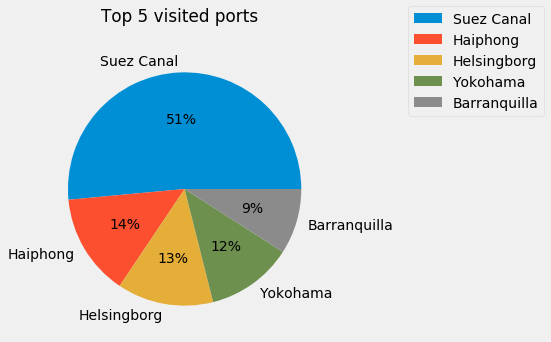

In [18]:
visited_most = pd.DataFrame(table['port1'].value_counts())
visited_most.head().plot.pie(y='port1',figsize=(5, 5),autopct='%1.0f%%' )
plt.suptitle('Top 5 visited ports')
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15))
plt.axes().set_ylabel('')

# Function to calculate number of ports visited acc. to any parameter 

In [19]:
def count_port(param): #param is any paramter (vessel type / harbor size .. etc)
    return table.groupby(param)['port1'].value_counts().sort_values(ascending=False)
    

In [20]:
count_port('Vessel_size')

Vessel_size  port1          
4            Suez Canal         134
1            Helsingborg         50
5            Suez Canal          46
1            Haiphong            43
             Barranquilla        34
                               ... 
3            Bakar                1
             Tauranga             1
1            Jakarta              1
             Tsing Yi Island      1
2            Xiamen               1
Name: port1, Length: 63, dtype: int64

In [21]:
t = table.groupby(['Vessel_size','Port name'])['imo'].count().sort_values(ascending=False).reset_index()


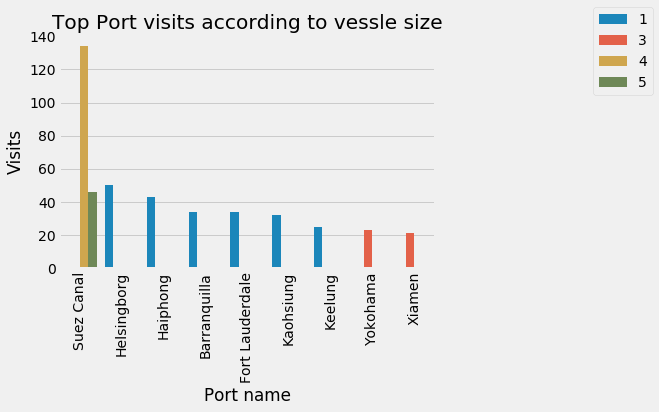

In [22]:
#t.head().plot(x="Port name", y=["imo"],data=t, hue='Vessle size', kind="bar")

ax=sns.barplot(data=t.head(10), \
                 x='Port name', \
                 y='imo', \
                 hue='Vessel_size', \
                 palette=sns.color_palette( n_colors=5))
ax.set( ylabel='Visits')
plt.title("Top Port visits according to vessle size")
plt.xticks(rotation=90)
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15),)

# Showing movement according to harbor size

In [23]:
count_port('Harbour size')

Harbour size  port1                      
0             Suez Canal                     193
              Haiphong                        53
3             Helsingborg                     50
0             Yokohama                        45
              Fort Lauderdale                 34
3             Barranquilla                    34
0             Kaohsiung                       32
              Bakar                           30
              Lyttelton                       29
3             Xiamen                          28
0             Keelung                         26
              Coco Solo North                 21
              Port Said                       19
2             Djibouti                        19
4             Wellington                      19
2             Tauranga                        18
4             Jakarta                         17
0             Tsing Yi Island                 17
2             Phillipsburg                    16
4             Liverpool    

In [24]:
m = table.groupby(['Harbour size','Port name'])['imo'].count().sort_values(ascending=False).reset_index()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

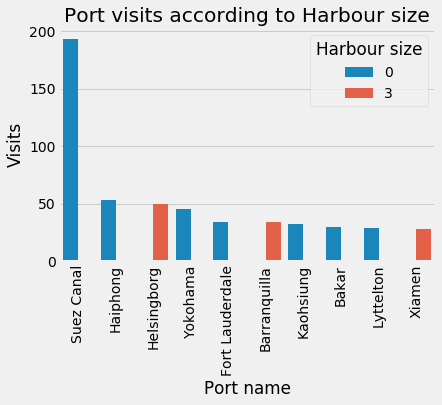

In [25]:
ax=sns.barplot(data=m.head(10), \
                 x='Port name', \
                 y='imo', \
                 hue='Harbour size', \
                 palette=sns.color_palette( n_colors=5))
ax.set( ylabel='Visits')
plt.title("Port visits according to Harbour size")
plt.xticks(rotation=90)

# Movements across years

In [26]:
no_17 =table.drop(table[table['Date'].dt.year==2017].index)


(array([2011., 2012., 2013., 2014., 2015., 2016., 2017.]),
 <a list of 7 Text xticklabel objects>)

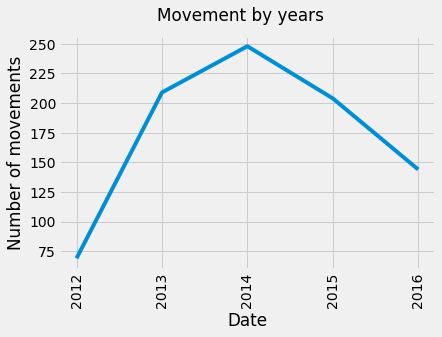

In [27]:
table.groupby([no_17['Date'].dt.year])['imo'].count().plot()
plt.ylabel('Number of movements')
plt.suptitle('Movement by years')
plt.xticks(rotation=90)

# Function to calculate number of ports visited for any paramter in each year 

In [28]:
def count_port_yearly(param):
    return table.groupby(table['Date'].dt.year)[param].value_counts().sort_values(ascending=False)

# How many ports have been visited most for each type of vessel size in each year ?

In [29]:
count_port_yearly('Vessel_size')

Date  Vessel_size
2015  1              114
2016  1              101
2014  4               91
      1               68
2013  2               62
      4               58
      1               47
2015  2               38
      3               32
2014  2               31
2012  1               29
2017  1               28
2014  3               26
2016  3               26
2014  5               24
2013  5               22
2012  4               22
2015  4               20
2013  3               19
2012  2               14
2016  2               10
2014  6                8
2016  4                7
2012  5                4
2013  6                1
Name: Vessel_size, dtype: int64

In [30]:
n = table.groupby([table['Date'].dt.year,'Vessel_size'])['imo'].count().sort_values(ascending=False).reset_index()


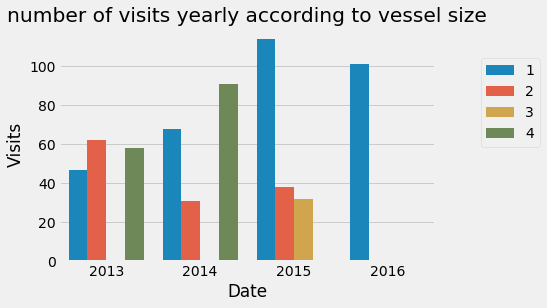

In [31]:
ax=sns.barplot(data=n.head(10), \
                 x='Date', \
                 y='imo', \
                 hue='Vessel_size', \
                 palette=sns.color_palette( n_colors=5))
ax.set( ylabel='Visits')


plt.title("number of visits yearly according to vessel size")
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 0.9))

# Function to know what ports have been visited most acc. to any parameter in each year

In [32]:
def what_ports_yearly(param):
    return table.groupby([table['Date'].dt.year,param])['port1'].value_counts().sort_values(ascending=False)

# What ports have been visited most for each type of vessel size in each year ?

In [33]:
what_ports_yearly('Vessel_size')

Date  Vessel_size  port1        
2013  4            Suez Canal       58
2014  4            Suez Canal       54
2016  1            Haiphong         36
                   Barranquilla     34
2015  1            Helsingborg      30
                                    ..
2013  3            Tauranga          1
2015  2            Keelung           1
2014  2            Hampton Roads     1
2015  2            Xiamen            1
2013  6            Suez Canal        1
Name: port1, Length: 77, dtype: int64

In [34]:
#table.groupby([table['Date'].dt.year,'Vessle size','Port name']).count().sort_values(ascending=False).reset_index()
a = table.groupby(['Port name',table['Date'].dt.year,'Vessel_size'])['imo'].count().sort_values(ascending=False).reset_index()


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x720 with 0 Axes>

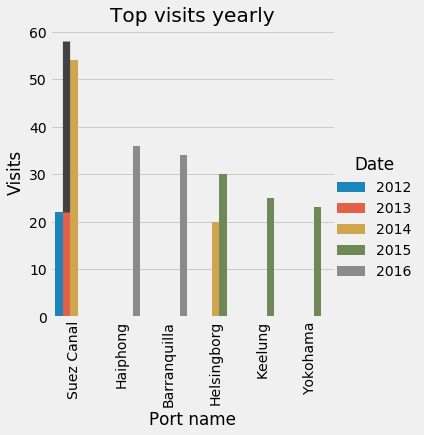

<Figure size 1440x720 with 0 Axes>

In [35]:
sns.factorplot(x='Port name', y='imo', hue='Date', data=a.head(10), kind='bar')

plt.title("Top visits yearly")
plt.ylabel('Visits')
plt.xticks(rotation=90)
plt.figure(figsize=(20,10))

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1, 'Top 10 visits happened ')

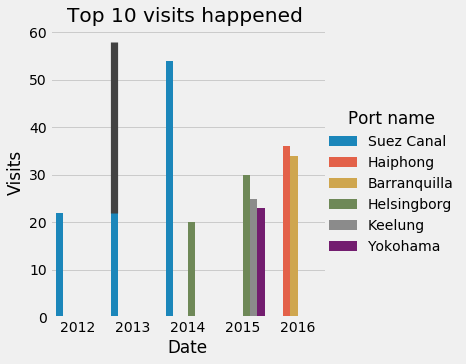

In [36]:
sns.factorplot(x='Date', y='imo', hue='Port name', data=a.head(10), kind='bar',palette=sns.color_palette())

ax.set( ylabel='Visits')
plt.ylabel('Visits')

plt.title("Top 10 visits happened ")


In [37]:
len(table[table['Vessel_size']==6])

9

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, '')

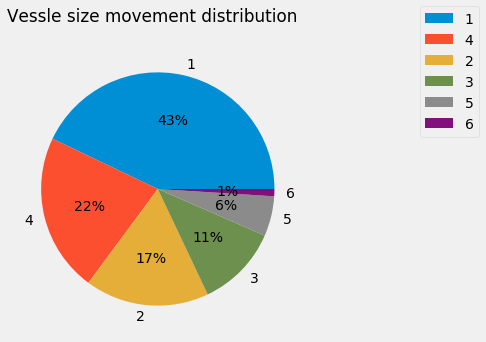

In [38]:
vessles = pd.DataFrame(table['Vessel_size'].value_counts())
vessles.plot.pie(y='Vessel_size', figsize=(5, 5),autopct='%1.0f%%')
plt.suptitle('Vessle size movement distribution')
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15))
plt.axes().set_ylabel('')



Text(0, 0.5, 'no. of visits')

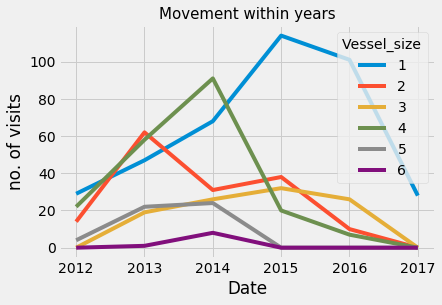

In [39]:
pd.crosstab(table['Date'].dt.year, table['Vessel_size']).plot()
plt.title('Movement within years',fontsize=15)
plt.ylabel('no. of visits')


In [40]:
qq = a[a['Date']==2015]
ww = a[a['Date']==2016]
ee = a[a['Date']==2017]
rr = a[a['Date']==2012]
tt = a[a['Date']==2013]
yy = a[a['Date']==2014]
    

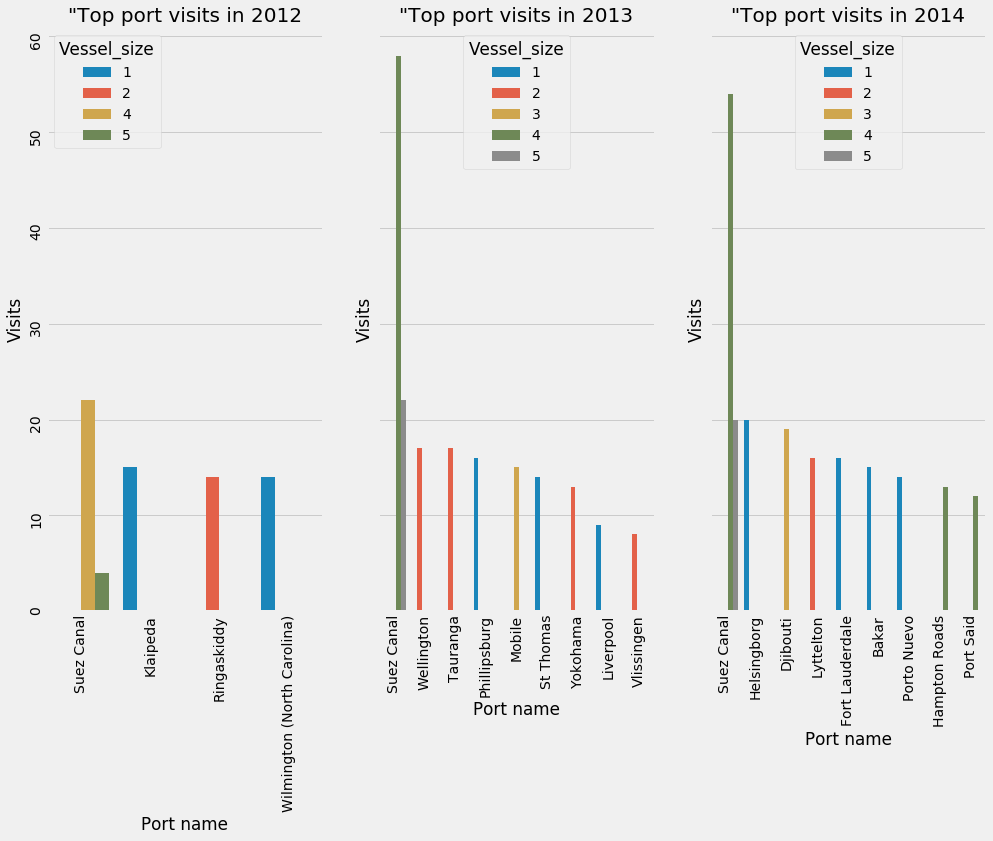

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

sns.barplot(ax=axes[0],x='Port name', y='imo', hue='Vessel_size', data=rr.head(10))
axes[0].set_title('"Top port visits in 2012',fontsize = 20)

sns.barplot(ax=axes[1],x='Port name', y='imo', hue='Vessel_size', data=tt.head(10))
axes[1].set_title('"Top port visits in 2013',fontsize = 20)

sns.barplot(ax=axes[2],x='Port name', y='imo', hue='Vessel_size', data=yy.head(10))
axes[2].set_title('"Top port visits in 2014',fontsize = 20)
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    ax.set( ylabel='Visits')

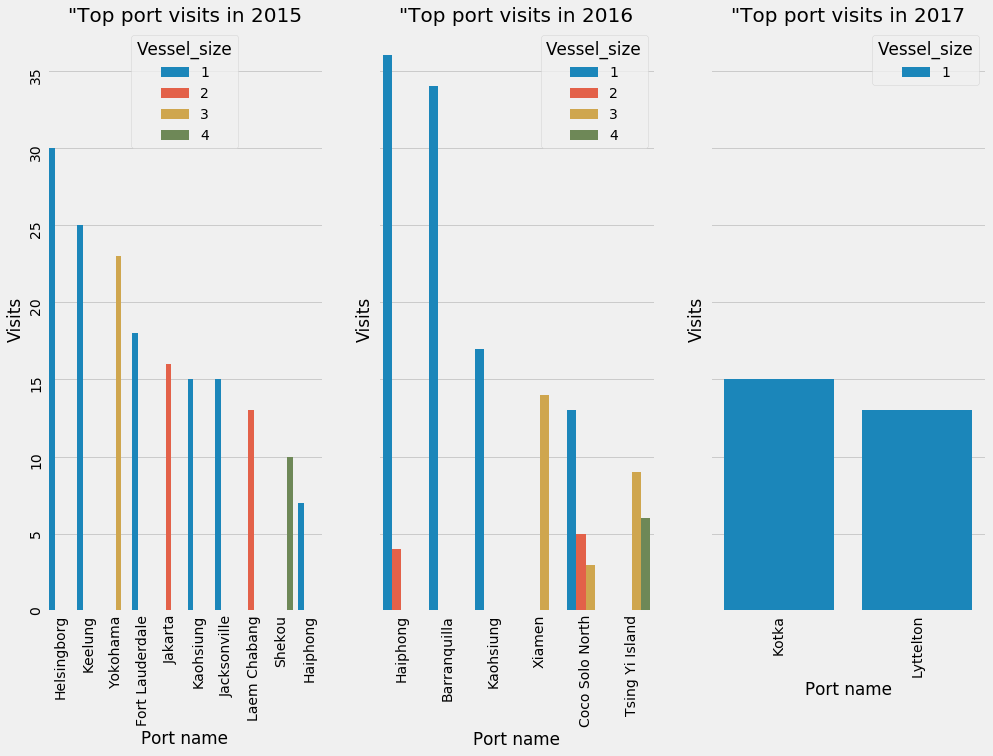

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

sns.barplot(ax=axes[0],x='Port name', y='imo', hue='Vessel_size', data=qq.head(10))
axes[0].set_title('"Top port visits in 2015',fontsize = 20)

sns.barplot(ax=axes[1],x='Port name', y='imo', hue='Vessel_size', data=ww.head(10))
axes[1].set_title('"Top port visits in 2016',fontsize = 20)

sns.barplot(ax=axes[2],x='Port name', y='imo', hue='Vessel_size', data=ee.head(10))
axes[2].set_title('"Top port visits in 2017',fontsize = 20)
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    ax.set( ylabel='Visits')

In [43]:
lookup = {
    11: 'Winter',
    12: 'Winter',
    1: 'Winter',
    2: 'Spring',
    3: 'Spring',
    4: 'Spring',
    5: 'Summer',
    6: 'Summer',
    7: 'Summer',
    8: 'Autumn',
    9: 'Autumn',
    10: 'Autumn'
}

In [44]:
table['Season'] = table['Date'].apply(lambda x: lookup[x.month])

# What ports have been visited most for each type of vessel size in each season ?

In [45]:
table.groupby([table['Season'],'Vessel_size'])['port1'].value_counts().sort_values(ascending=False)

Season  Vessel_size  port1          
Summer  4            Suez Canal         63
Autumn  4            Suez Canal         50
Summer  5            Suez Canal         21
        1            Haiphong           20
                     Helsingborg        18
                                        ..
Spring  2            Tsing Yi Island     1
                     Yokohama            1
        3            Bakar               1
                     Port Said           1
        4            Xiamen              1
Name: port1, Length: 192, dtype: int64

In [46]:
z = table.groupby(['Port name',table['Season'],'Vessel_size'])['imo'].count().sort_values(ascending=False).reset_index()


In [47]:
Summer = z[z['Season']=='Summer']
Autumn = z[z['Season']=='Autumn']
Spring = z[z['Season']=='Spring']
Winter = z[z['Season']=='Winter']


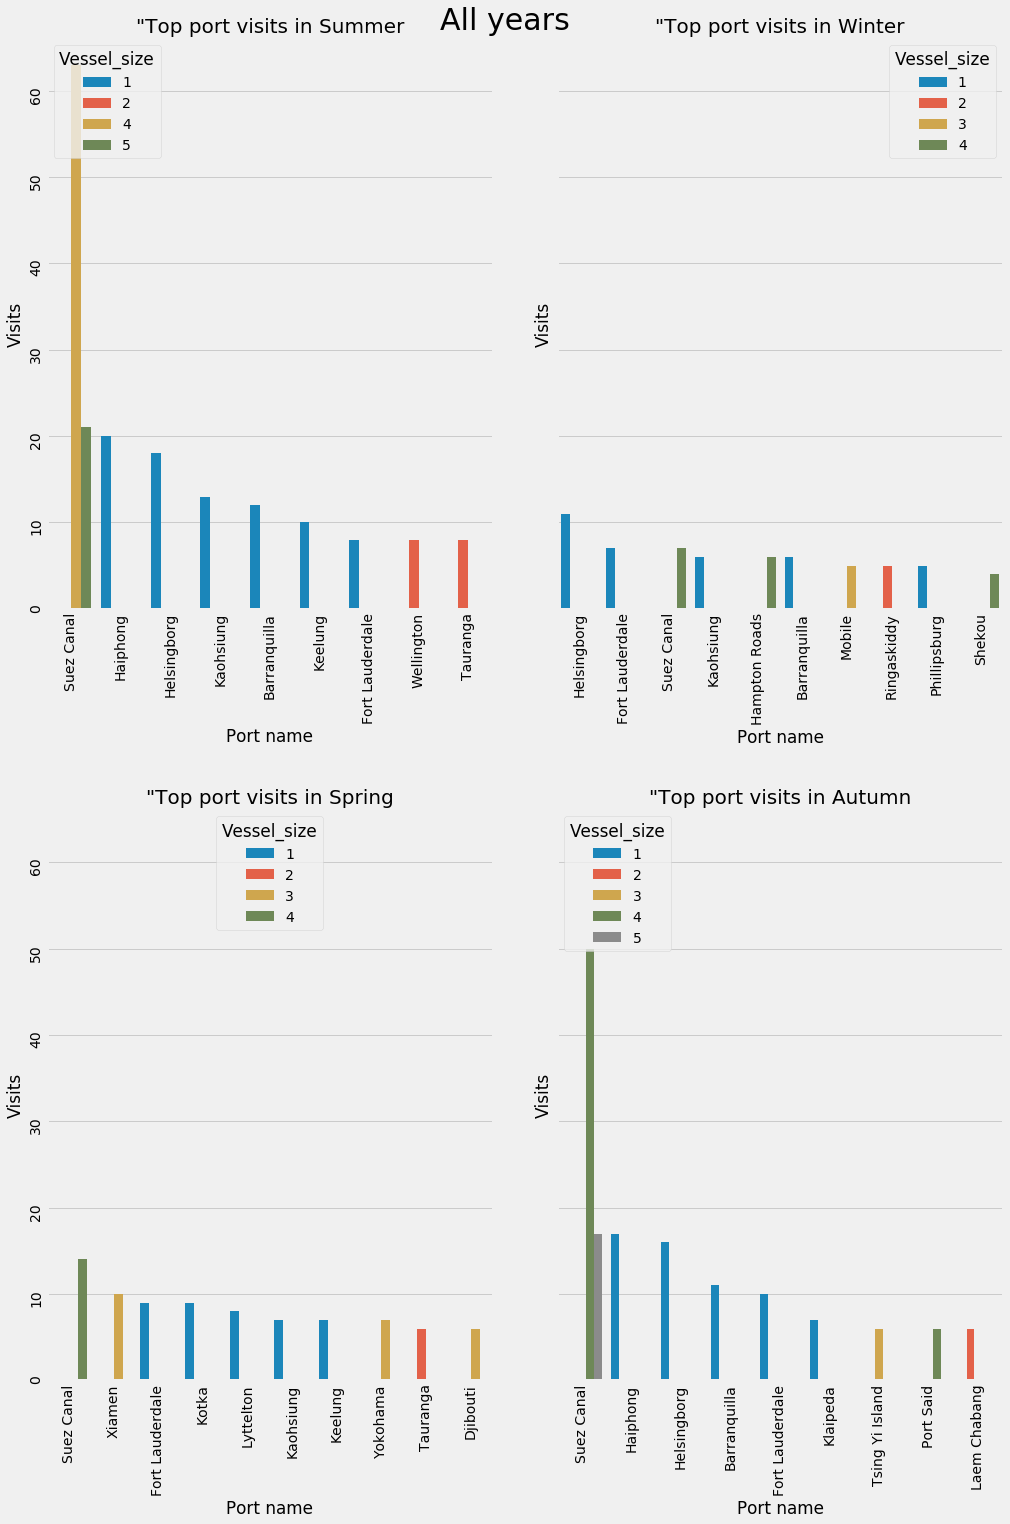

In [48]:
fig, axes = plt.subplots(2,2, figsize=(15,22),sharey= True)

sns.barplot(ax=axes[0,0],x='Port name', y='imo', hue='Vessel_size', data=Summer.head(10))
axes[0,0].set_title('"Top port visits in Summer',fontsize = 20)

sns.barplot(ax=axes[0,1],x='Port name', y='imo', hue='Vessel_size', data=Winter.head(10))
axes[0,1].set_title('"Top port visits in Winter',fontsize = 20)

sns.barplot(ax=axes[1,0],x='Port name', y='imo', hue='Vessel_size', data=Spring.head(10))
axes[1,0].set_title('"Top port visits in Spring',fontsize = 20)

sns.barplot(ax=axes[1,1],x='Port name', y='imo', hue='Vessel_size', data=Autumn.head(10))
axes[1,1].set_title('"Top port visits in Autumn',fontsize = 20)
plt.rcParams['figure.constrained_layout.use'] = True
plt.suptitle('All years',fontsize=30)
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    ax.set( ylabel='Visits')
    
fig.tight_layout(pad=3.0)    

In [49]:
def seasonal(su,win,sp,au,year):
    fig, axes = plt.subplots(2,2, figsize=(15,22),sharey= True)

    sns.barplot(ax=axes[0,0],x='Port name', y='imo', hue='Vessel_size', data=su.head(10))
    axes[0,0].set_title('"Top port visits in Summer',fontsize = 20)

    sns.barplot(ax=axes[0,1],x='Port name', y='imo', hue='Vessel_size', data=win.head(10))
    axes[0,1].set_title('"Top port visits in Winter',fontsize = 20)

    sns.barplot(ax=axes[1,0],x='Port name', y='imo', hue='Vessel_size', data=sp.head(10))
    axes[1,0].set_title('"Top port visits in Spring',fontsize = 20)

    sns.barplot(ax=axes[1,1],x='Port name', y='imo', hue='Vessel_size', data=au.head(10))
    axes[1,1].set_title('"Top port visits in Autumn',fontsize = 20)
    plt.rcParams['figure.constrained_layout.use'] = True
    plt.suptitle(year,fontsize=30)
    fig.tight_layout(pad=10.0)
    for ax in fig.axes:
        ax.tick_params(labelrotation=90)
        ax.set( ylabel='Visits')
    


In [50]:
zz = table.groupby(['Port name',table['Season'],'Vessel_size',table['Date'].dt.year])['imo'].count().sort_values(ascending=False).reset_index()
zz

,Port name,Season,Vessel_size,Date,imo
0,Suez Canal,Summer,4,2013,34
1,Suez Canal,Autumn,4,2014,25
2,Suez Canal,Autumn,4,2013,20
3,Suez Canal,Summer,4,2014,19
4,Haiphong,Summer,1,2016,18
...,...,...,...,...,...
221,Suez Canal,Summer,3,2014,1
222,Suez Canal,Summer,6,2014,1
223,Klaipeda,Spring,1,2012,1
224,Suez Canal,Winter,3,2014,1


In [51]:
years = zz['Date'].unique()
years


array([2013, 2014, 2016, 2015, 2012, 2017], dtype=int64)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


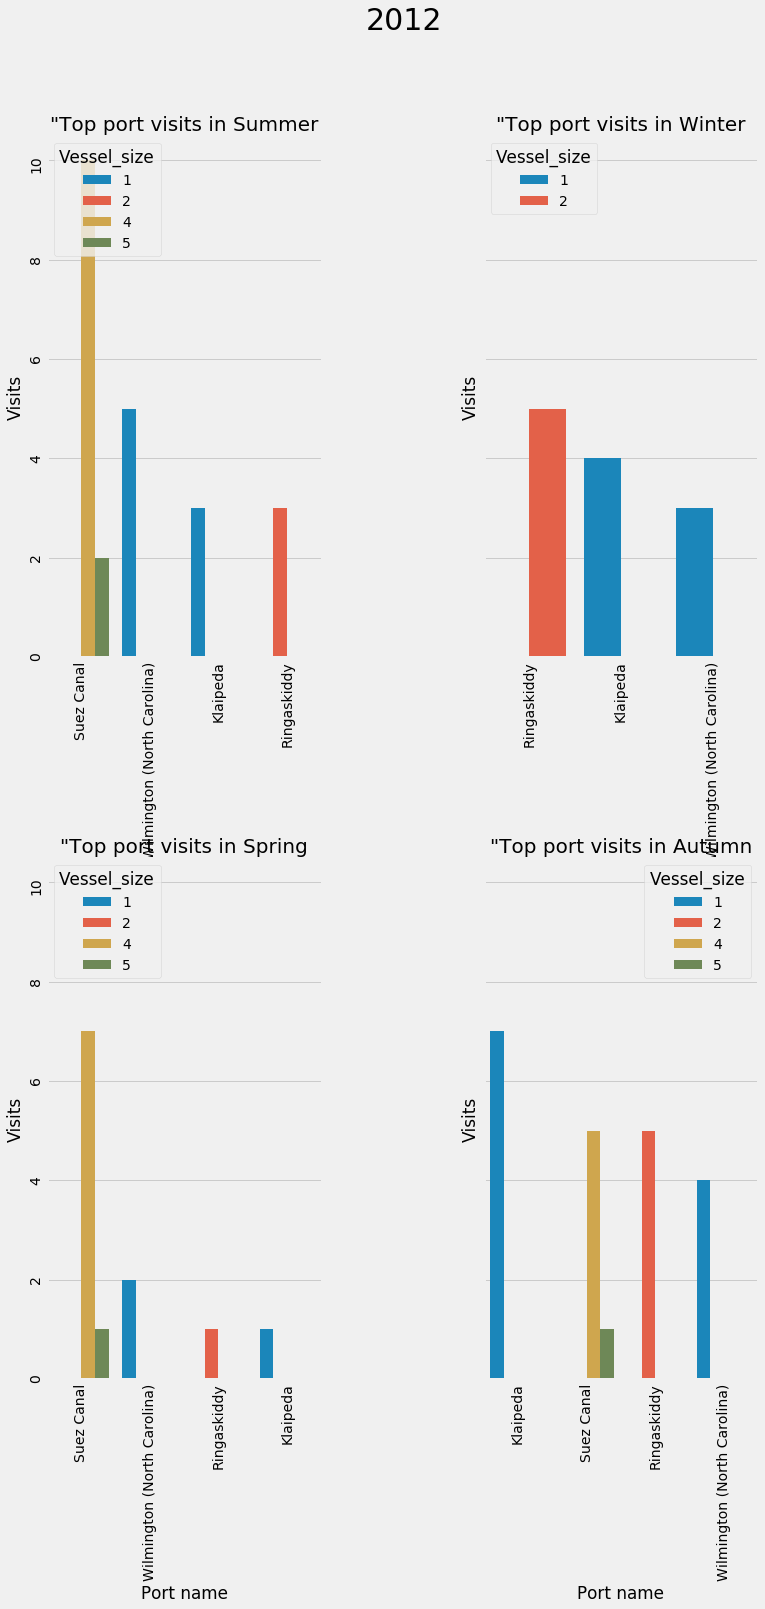

In [52]:

aa = zz[zz['Date']==2012]

su = aa[aa['Season']=='Summer']
au = aa[aa['Season']=='Autumn']
sp = aa[aa['Season']=='Spring']
win = aa[aa['Season']=='Winter']
seasonal(su,win,sp,au,2012)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


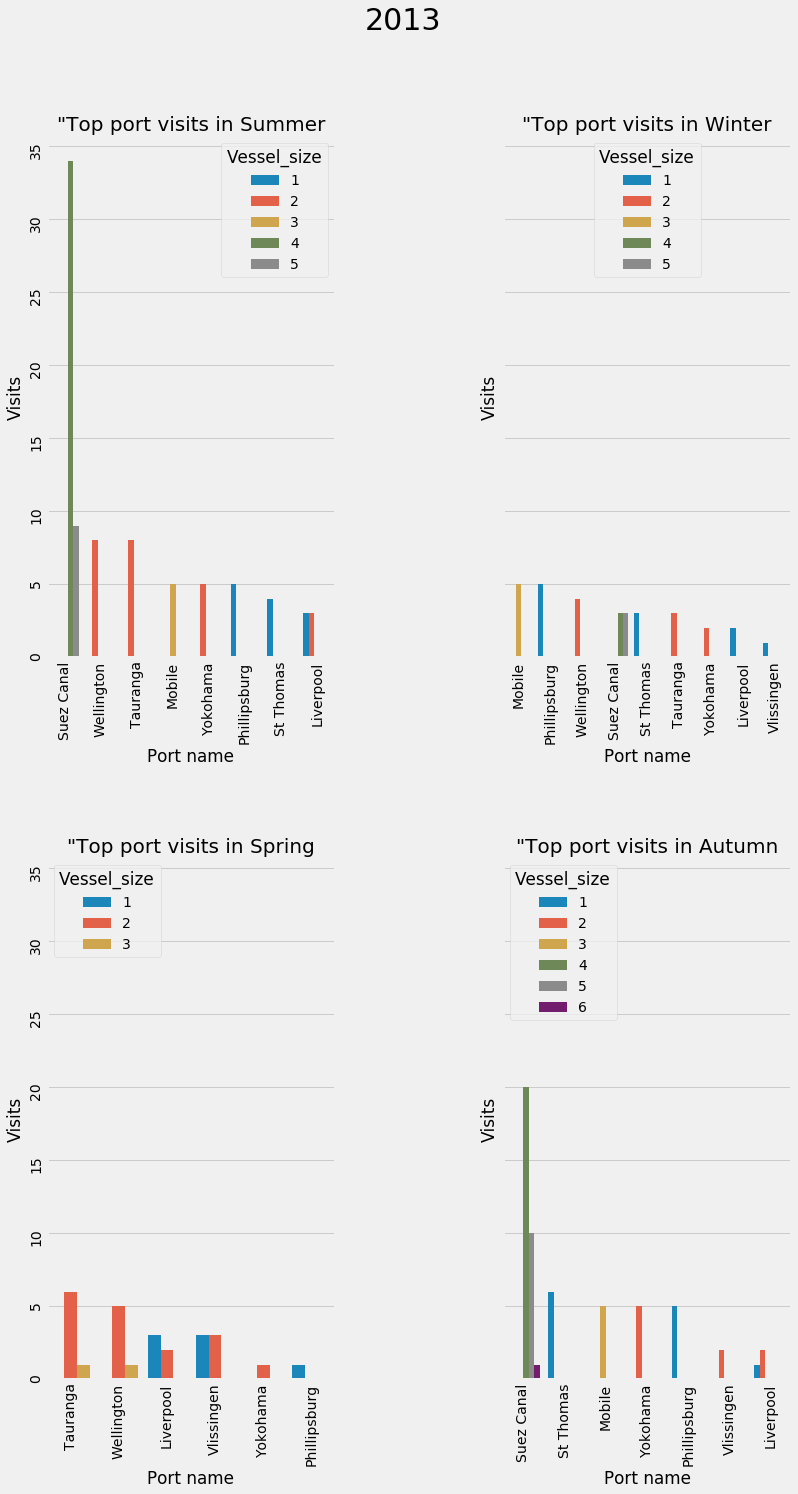

In [53]:
aa = zz[zz['Date']==2013]

su = aa[aa['Season']=='Summer']
au = aa[aa['Season']=='Autumn']
sp = aa[aa['Season']=='Spring']
win = aa[aa['Season']=='Winter']
seasonal(su,win,sp,au,2013)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


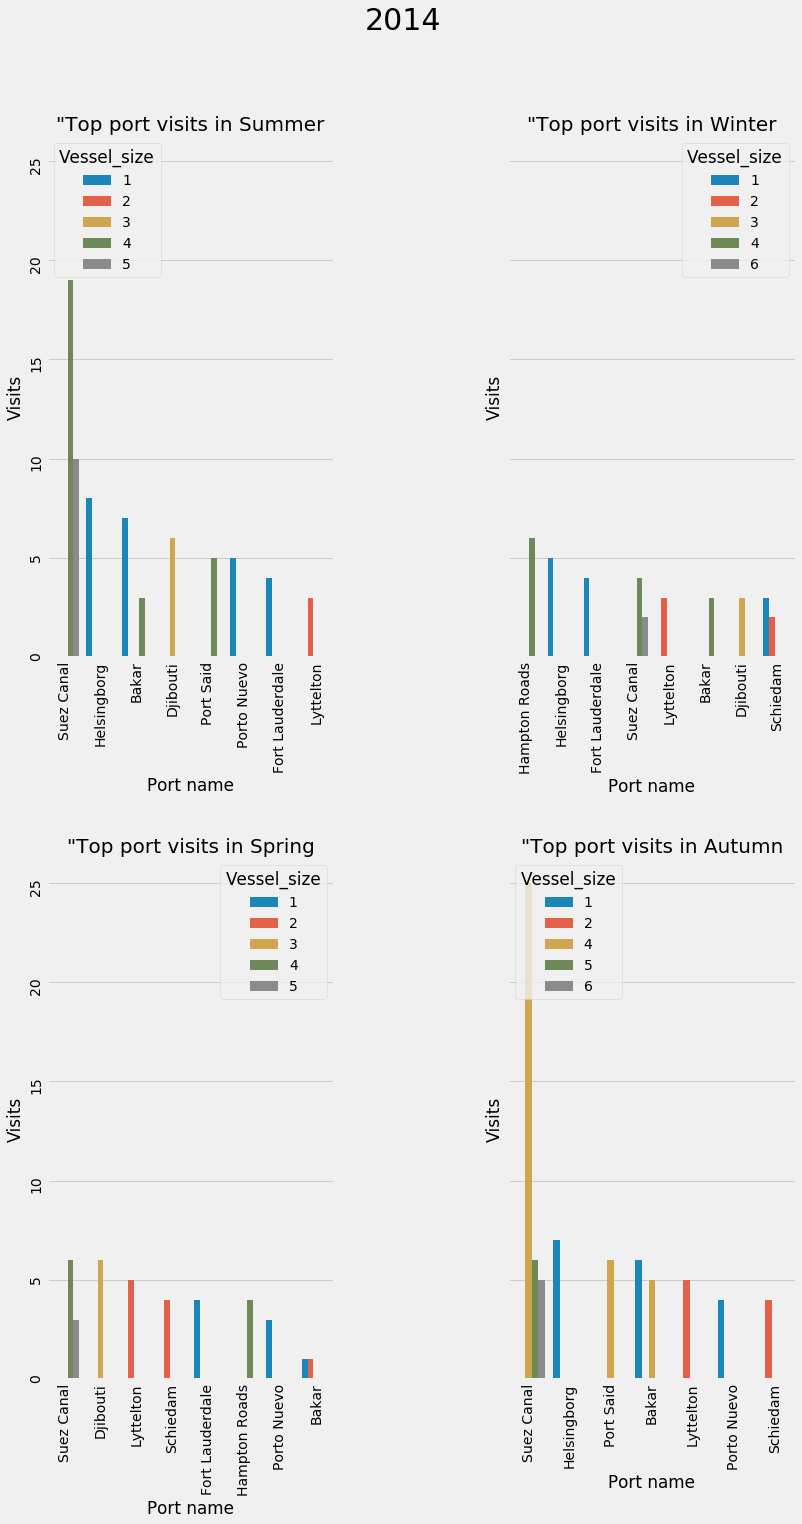

In [54]:
aa = zz[zz['Date']==2014]

su = aa[aa['Season']=='Summer']
au = aa[aa['Season']=='Autumn']
sp = aa[aa['Season']=='Spring']
win = aa[aa['Season']=='Winter']
seasonal(su,win,sp,au,2014)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


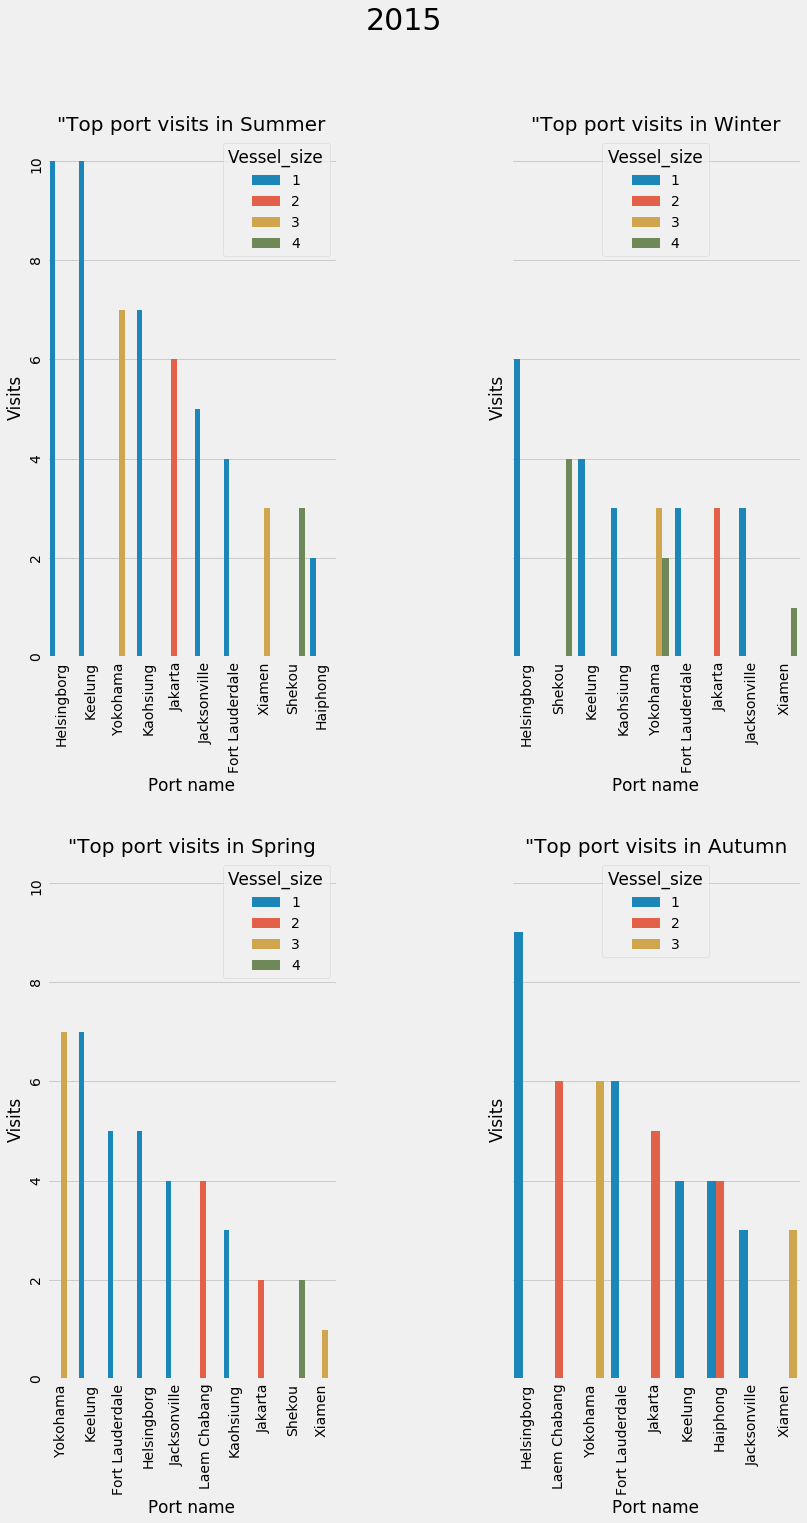

In [55]:
aa = zz[zz['Date']==2015]

su = aa[aa['Season']=='Summer']
au = aa[aa['Season']=='Autumn']
sp = aa[aa['Season']=='Spring']
win = aa[aa['Season']=='Winter']
seasonal(su,win,sp,au,2015)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


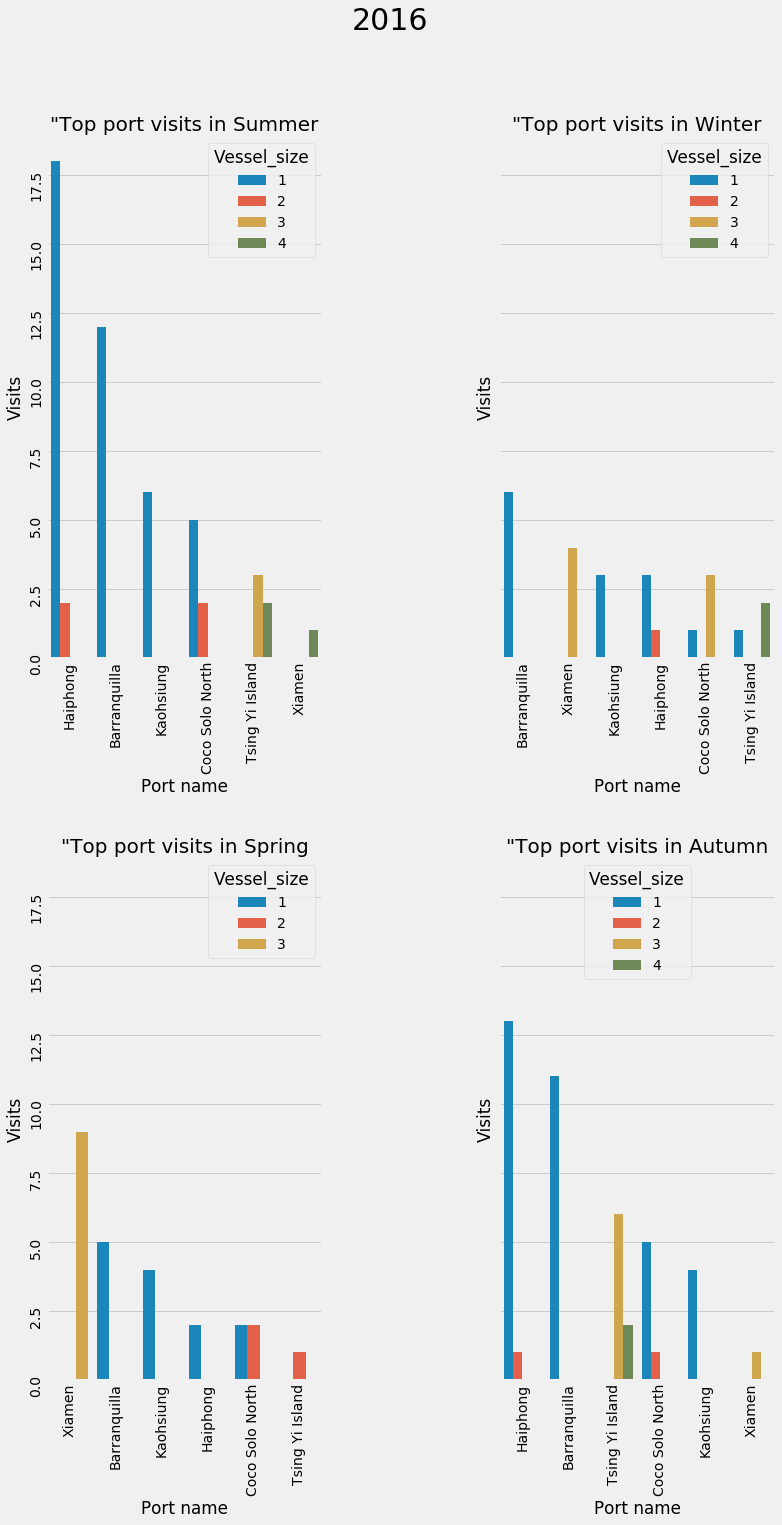

In [56]:
aa = zz[zz['Date']==2016]

su = aa[aa['Season']=='Summer']
au = aa[aa['Season']=='Autumn']
sp = aa[aa['Season']=='Spring']
win = aa[aa['Season']=='Winter']
seasonal(su,win,sp,au,2016)

ValueError: min() arg is an empty sequence

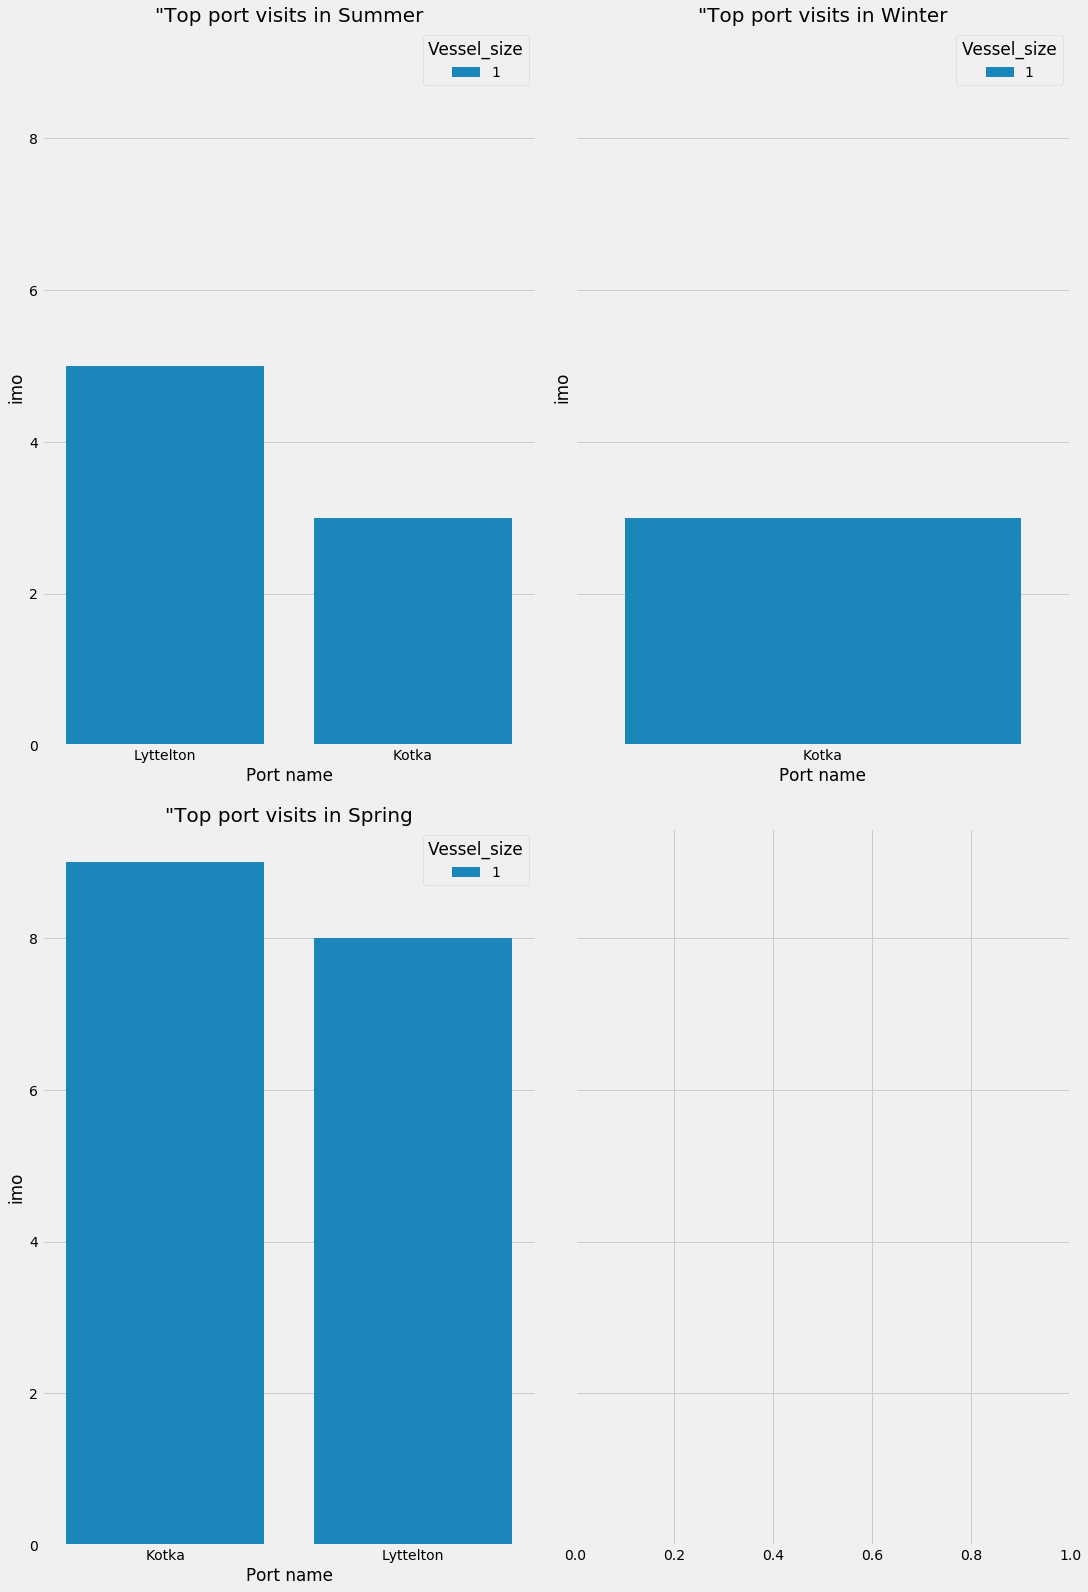

In [57]:
aa = zz[zz['Date']==2017]

su = aa[aa['Season']=='Summer']
au = aa[aa['Season']=='Autumn']
sp = aa[aa['Season']=='Spring']
win = aa[aa['Season']=='Winter']
seasonal(su,win,sp,au,2017)

In [ ]:
pd.crosstab(table['Season'], table['Vessel_size']).plot.bar()
plt.legend(loc="upper center", bbox_to_anchor=(1, 1.15))
plt.title('Movement within seasons',fontsize=15)
plt.ylabel('no. of visits')
plt.legend(loc="upper center", bbox_to_anchor=(1, 1.15))

Text(0.5, 1.0, 'Top port sesonal visits regarding vessle size ')

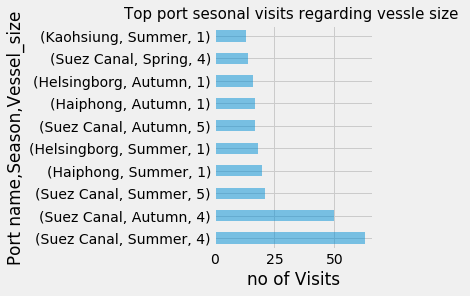

In [58]:
table.groupby(['Port name',table['Season'],'Vessel_size'])['imo'].count().sort_values(ascending=False).head(10).plot.barh(stacked=True, alpha=0.5)
plt.xlabel('no of Visits')
plt.title('Top port sesonal visits regarding vessle size ', fontsize=15)

# What ports have been visited most for each type of vessel size in each month ?

In [59]:
table.groupby([table['Date'].dt.month.rename('month'),'Vessel_size'])['port1'].value_counts().sort_values(ascending=False)

month  Vessel_size  port1       
8      4            Suez Canal      33
7      4            Suez Canal      29
6      4            Suez Canal      24
9      4            Suez Canal      11
4      4            Suez Canal      11
                                    ..
5      3            Xiamen           1
10     1            Jacksonville     1
                    Liverpool        1
                    Phillipsburg     1
12     5            Suez Canal       1
Name: port1, Length: 398, dtype: int64

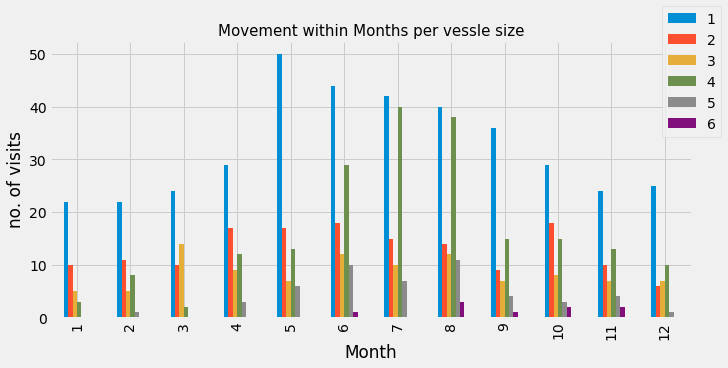

In [60]:
pd.crosstab(table['Date'].dt.month, table['Vessel_size']).plot.bar(figsize=(10,5))
plt.title('Movement within Months per vessle size', fontsize=15)
plt.ylabel('no. of visits')
plt.xlabel('Month')
plt.legend(loc="upper center", bbox_to_anchor=(1, 1.15))

In [61]:
top_active = pd.DataFrame(table.groupby('Port name')['imo'].count().sort_values(ascending=False).head())
top_ports = list(top_active.index)
print(top_ports)

['Suez Canal', 'Haiphong', 'Helsingborg', 'Yokohama', 'Barranquilla']


In [62]:
p = pd.DataFrame(pd.crosstab(table['Date'].dt.month,table['Port name']))

In [63]:
pp = pd.DataFrame(p, columns =['Suez Canal', 'Haiphong', 'Helsingborg', 'Yokohama', 'Barranquilla'] )

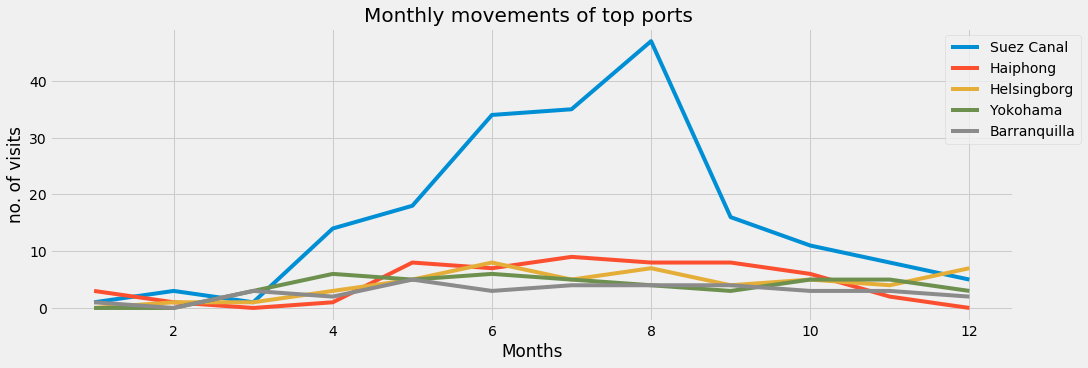

In [64]:
pp.plot(figsize=(15,5))

plt.title('Monthly movements of top ports ',fontsize=20)
plt.xlabel('Months')
plt.ylabel('no. of visits')
plt.legend(loc="upper center", bbox_to_anchor=(1, 1))

# Which months are the busier ? 

Text(0.5, 0.98, 'Total Movements per Month')

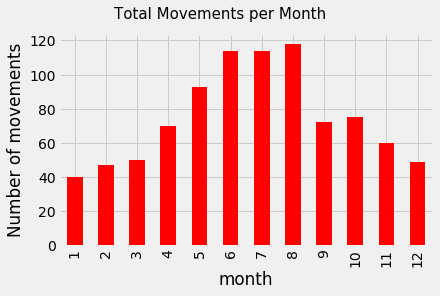

In [65]:
table['imo'].groupby(table['Date'].dt.month.rename('month')).agg('count').plot.bar(color=['red'])
plt.ylabel('Number of movements')
plt.suptitle('Total Movements per Month',fontsize=15)

# What is the average sailing time per each route between the ports? 

In [66]:
table.groupby(['route'])['sailing_time'].mean().sort_values(ascending=False)

route
Europe/North America               10.270833
Middle America/North America        4.489583
East Africa/Middle East             4.039474
East Asia/South-East Asia           3.586538
North America/Middle America        2.136029
South-East Asia/South-East Asia     1.672481
North America/North America         1.303161
East Asia/East Asia                 1.223976
Middle America/South America        1.009633
Oceania/Oceania                     0.984132
South-East Asia/East Asia           0.960589
Europe/Europe                       0.776818
Middle America/Middle America       0.669643
North Africa/North Africa           0.394654
South America/South America         0.306916
Name: sailing_time, dtype: float64

Text(0.5, 0.98, 'Average sailing time per routes')

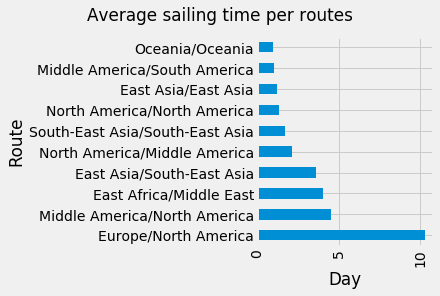

In [67]:
table.groupby(['route'])['sailing_time'].mean().sort_values(ascending=False).head(10).plot.barh()
plt.xticks(rotation='vertical')
plt.ylabel('Route')
plt.xlabel('Day')
plt.suptitle('Average sailing time per routes')

# Function to calculate average sailing time according to any paramter 

In [68]:
def avg_sail_time(param):
    return table.groupby([param])['sailing_time'].mean().sort_values(ascending=False)
    

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

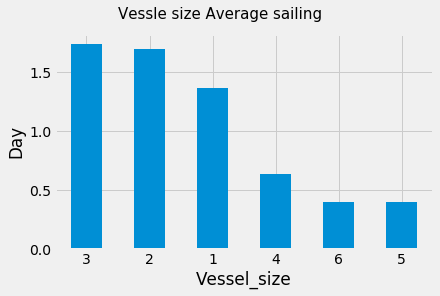

In [69]:

avg_sail_time('Vessel_size').plot(kind = 'bar')
plt.suptitle('Vessle size Average sailing',fontsize=15)
plt.ylabel('Day')
plt.xticks(rotation = 'horizontal')


In [70]:
table['port_conncetions'] = table['port1'] + ' to ' + table['port2']

# Number of ports connections

In [71]:
len(table['port_conncetions'].unique())

38

# Highest total movements between ports .. which ports are better connected?

In [72]:
table['imo'].groupby(table['port_conncetions']).count().sort_values(ascending=False).head()


port_conncetions
Suez Canal to El Ismailiya     193
Helsingborg to Goteborg         50
Yokohama to Tokai               45
Barranquilla to Santa Marta     34
Fort Lauderdale to Kingston     34
Name: imo, dtype: int64

# Top 10 Vessel movements 

Text(0, 0.5, 'connections')

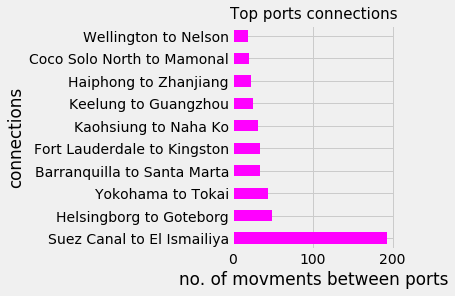

In [73]:
table['imo'].groupby(table['port_conncetions']).count().sort_values(ascending=False).head(10).plot(kind = 'barh',color='fuchsia')
plt.title('Top ports connections',fontsize=15)
plt.xlabel('no. of movments between ports')
plt.ylabel('connections')


# Which routes with the highest movement ? 

In [74]:
table['imo'].groupby(table['route']).count().sort_values(ascending=False).head()

route
North Africa/North Africa      212
Europe/Europe                  154
East Asia/East Asia            148
Oceania/Oceania                 66
North America/North America     58
Name: imo, dtype: int64

Text(0, 0.5, 'Routes')

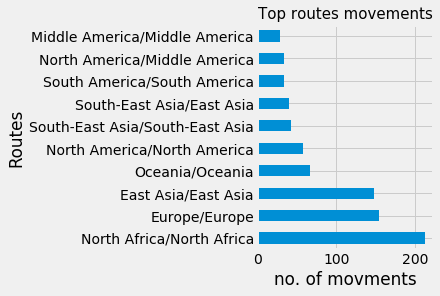

In [75]:
table['imo'].groupby(table['route']).count().sort_values(ascending=False).head(10).plot(kind = 'barh')
plt.title('Top routes movements',fontsize=15)
plt.xlabel('no. of movments')
plt.ylabel('Routes')



# Is sailing time differ between months ?

Text(0.5, 0, 'Month')

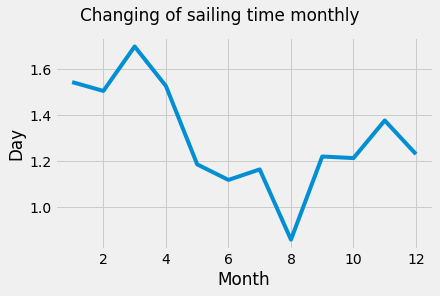

In [76]:
#table.plot(x =table['Date'].dt.year, y='port_time', kind = 'line', figsize=(15,5))
table.groupby(table['Date'].dt.month)['sailing_time'].mean().plot()
plt.suptitle('Changing of sailing time monthly')
plt.ylabel('Day')
plt.xlabel('Month')

# Is port time differ between months ?

Text(0.5, 0, 'Month')

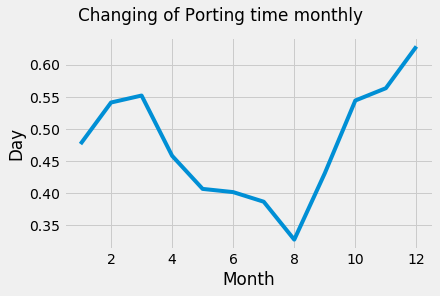

In [77]:
table.groupby(table['Date'].dt.month)['port_time'].mean().plot()
plt.suptitle('Changing of Porting time monthly')
plt.ylabel('Day')
plt.xlabel('Month')

## denisty shows the distrubtion of values for port and sail time

### Also shows the overlapping between them according to port visits

# Denisty of sail and port time

Text(0, 0.5, 'Frequency')

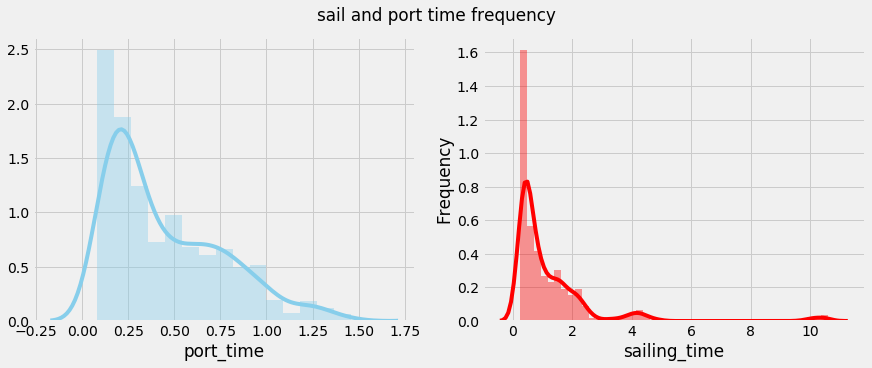

In [78]:
import seaborn as sns
f, axes = plt.subplots(1, 2,figsize=(12,5))
sns.distplot( table["port_time"] , color="skyblue", label="port_time", ax=axes[0])
plt.ylabel('Frequency')
sns.distplot( table["sailing_time"] , color="red", label="sail_time",ax=axes[1])
plt.suptitle('sail and port time frequency')
plt.ylabel('Frequency')


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1742: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  f.tight_layout()


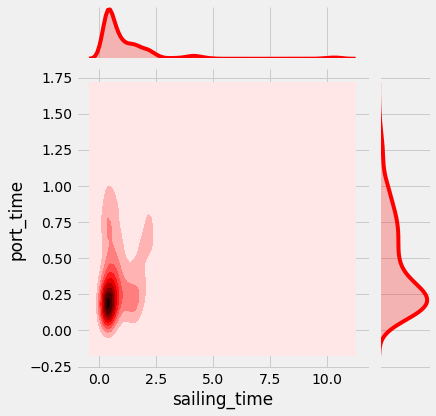

In [79]:

sns.jointplot(x=table["sailing_time"], y=table["port_time"], kind='kde',color = 'red')

In [80]:
table.columns

Index(['imo', 'Date', 'arrival', 'departure', 'country2', 'port2', 'country1',
       'port1', 'region2', 'region1', 'route', 'route_cat', 'sailing_time',
       'port_time', 'Vessel_size', 'Port name', 'Country', 'Code',
       'Harbour size', 'Shelter affored', 'Overhead limitation',
       'Channel depth', 'Anchorage depth', 'Cargo pier depth', 'Oil terminal',
       'Max vessel size', 'Turing area', 'Coords X', 'Coords Y', 'Season',
       'port_conncetions'],
      dtype='object')

In [81]:
bbbb=table.groupby('Port name').agg(
             visits=('imo', 'count'),
             port=('port_time', 'mean'),
             sail=('sailing_time', 'mean')).reset_index()
print('Number of ports = ', len(bbbb))


Number of ports =  33


# Box plots showing summary statistics (average, quartailes, min, max values and outliers ) for port and sail time

Text(0.5, 1.0, '"Port time statistics ')

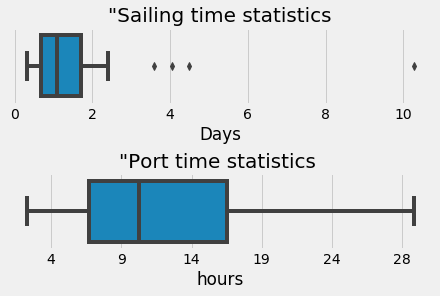

In [82]:

fig, axes = plt.subplots(2,1)
ax = sns.boxplot(x=bbbb["sail"],ax=axes[0])
ax.set(xlabel='Days')
ax = sns.boxplot(x=bbbb["port"],ax=axes[1])
ax.set(xlabel='hours')
ax.set_xticklabels((ax.get_xticks() * 24).astype(int))

axes[0].set_title('"Sailing time statistics',fontsize = 20)

axes[1].set_title('"Port time statistics ',fontsize = 20)

In [83]:
parameters = table[['Harbour size',
       'Shelter affored', 'Overhead limitation', 'Channel depth',
       'Anchorage depth', 'Cargo pier depth', 'Oil terminal',
       'Max vessel size', 'Turing area','Vessel_size','sailing_time','port_time']]

In [84]:
parameters.columns

Index(['Harbour size', 'Shelter affored', 'Overhead limitation',
       'Channel depth', 'Anchorage depth', 'Cargo pier depth', 'Oil terminal',
       'Max vessel size', 'Turing area', 'Vessel_size', 'sailing_time',
       'port_time'],
      dtype='object')

 # Correlations between the variables 

In [85]:
correlation = parameters.corr()


## correlation heatmap between the variables 
### the numbers ranges from [-1,1] 
#### -1 : strong negative realtion | 0 : no relation | 1 strong pos. relation

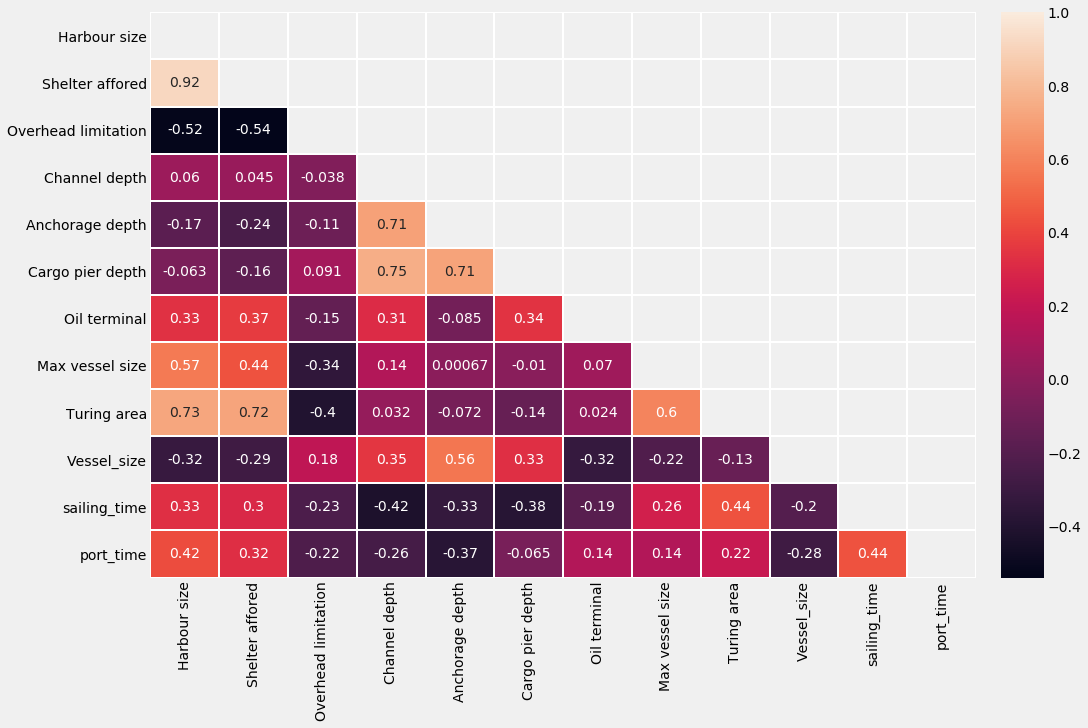

In [86]:
import seaborn as sn
plt.figure(figsize = (15,10))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sn.heatmap(correlation, annot=True, mask=mask, linewidths=1)
plt.show()

In [87]:
from mpl_toolkits.basemap import Basemap, shiftgrid

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


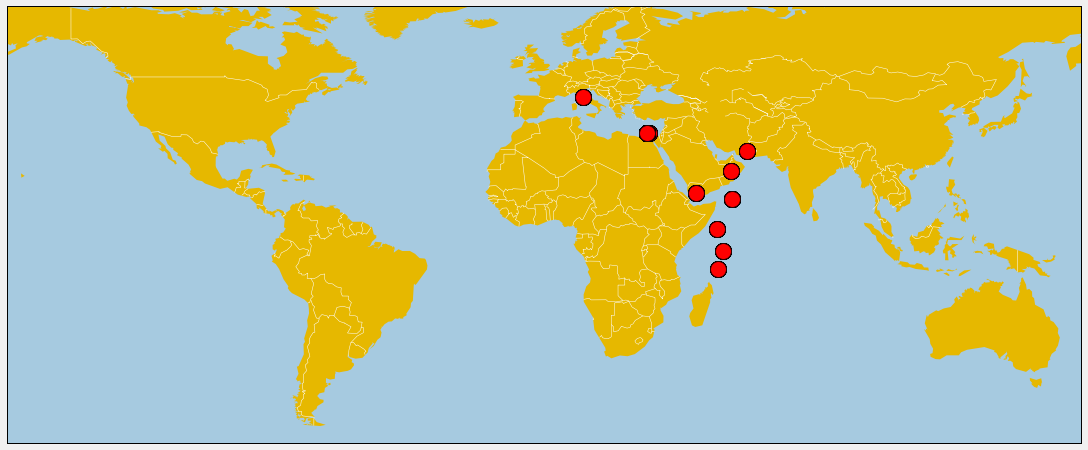

In [88]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
# Initialize the map
map = Basemap(llcrnrlon=-160, llcrnrlat=-60,urcrnrlon=160,urcrnrlat=70)
 
# Continent and countries!
map.drawmapboundary(fill_color='#A6CAE0')
map.fillcontinents(color='#e6b800',lake_color='#e6b800')
map.drawcountries(color="white")
map.plot(table['Coords X'], table['Coords Y'], linestyle='none', marker="o", markersize=16, alpha=0.6, c="red", markeredgecolor="black", markeredgewidth=1)

plt.show()


In [89]:
aaaa= table.drop(['Coords X', 'Coords Y'], axis=1)



# Is there a correlation between the variables and sailing time?

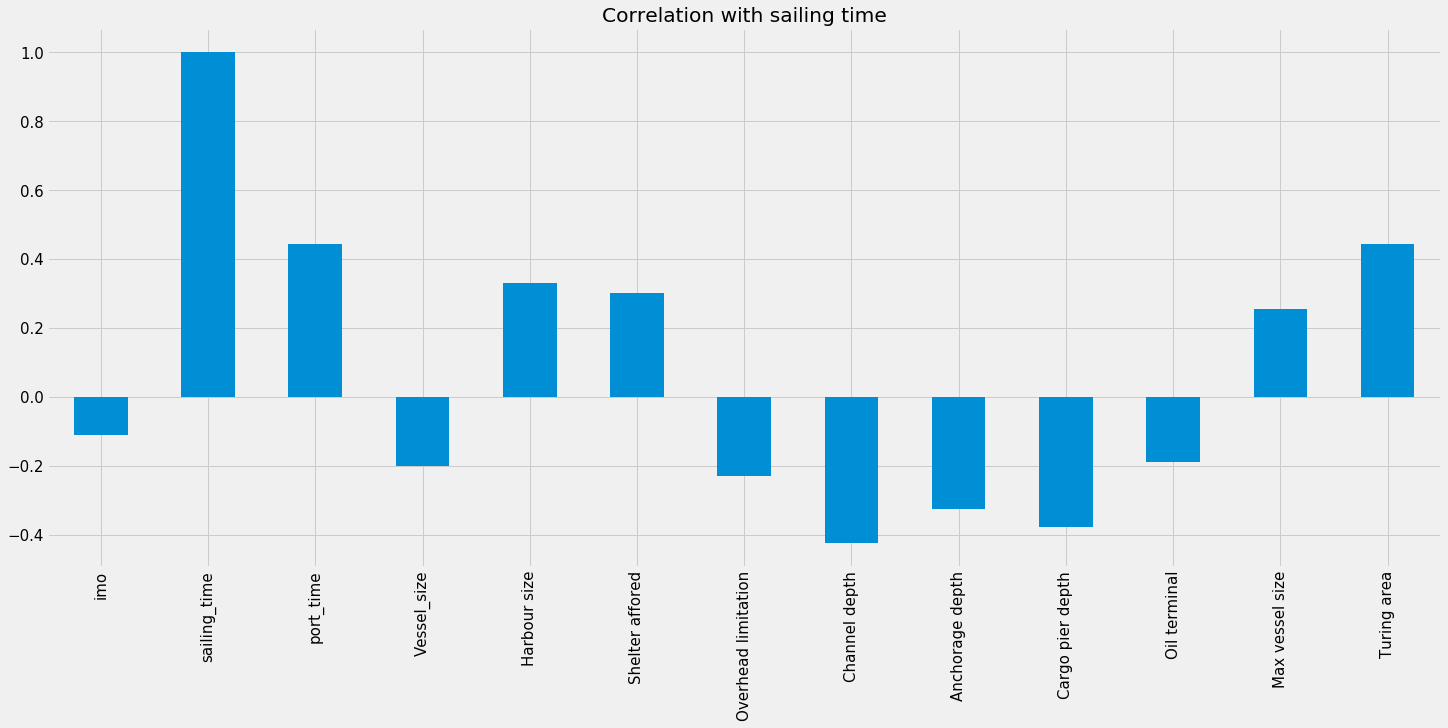

In [90]:
aaaa.corrwith(aaaa.sailing_time).plot.bar(figsize=(20,10),
              title = 'Correlation with sailing time',
              fontsize = 15,
              grid = True)


# Which ports in future needs to expand to decrease the port times and make more smoother movement ?

In [91]:
t = table[['port1','port_time']]
ports = t.groupby('port1').mean()
ports.sort_values(by='port_time',ascending=False).head()

,port_time
port1,
Liverpool,1.234375
Klaipeda,1.158333
Hampton Roads,1.035714
Jacksonville,0.836111
Helsingborg,0.829167


# Is there a correlation between the variables and porting time? which variables are more important for future expansion?

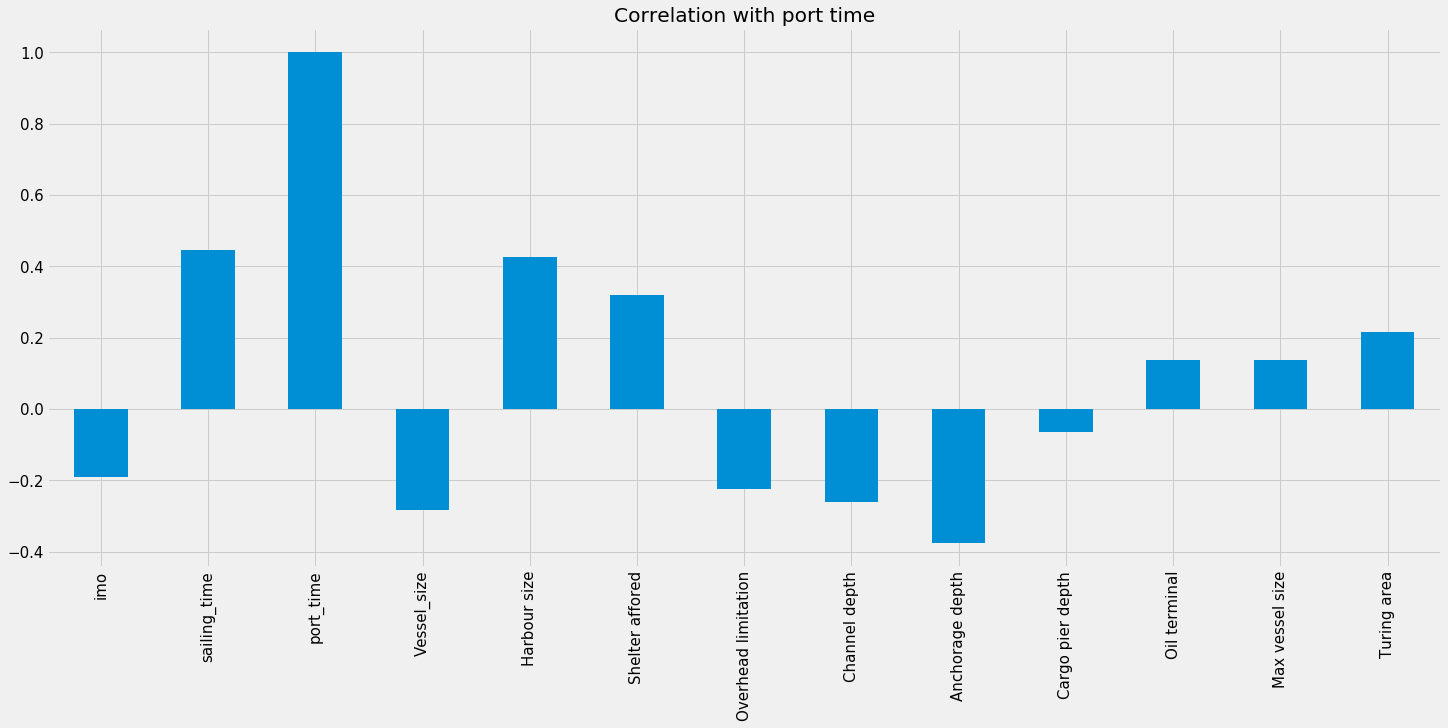

In [92]:
aaaa.corrwith(aaaa.port_time).plot.bar(figsize=(20,10),
              title = 'Correlation with port time',
              fontsize = 15,
              grid = True)


# Clustering ports visits with sailing and porting time  

In [105]:
bbbb.head()

,Port name,visits,port,sail
0,Bakar,30,0.659722,0.668056
1,Barranquilla,34,0.274330,0.306916
2,Coco Solo North,21,0.436438,1.009633
3,Djibouti,19,0.778509,4.039474
4,Fort Lauderdale,34,0.708333,2.136029


In [127]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X = bbbb.iloc[:, [2,3]].values

X= StandardScaler().fit_transform(X)

In [128]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()

#X = parameters.iloc[:, [10,11]].values

#X= StandardScaler().fit_transform(X)

In [129]:
#parameters.tail()

# The elbow method is a mathmatical technique for determining the number of clusters
## the distortion score is computed, the sum of square distances from each point to its assigned center of cluster

## look at the y label , when the decreasing stops to make big drop that's the number of clusters we want

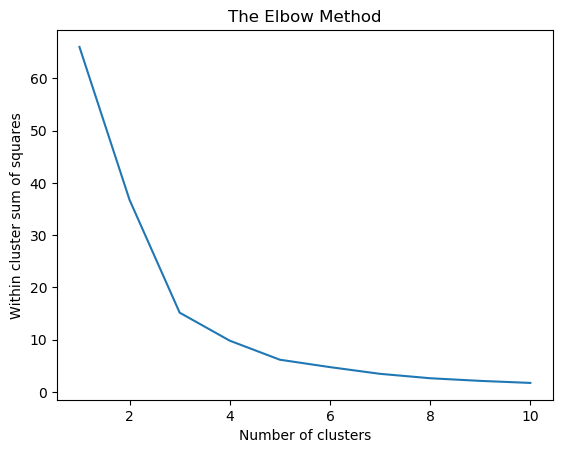

In [131]:
style.use('default')
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

In [132]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

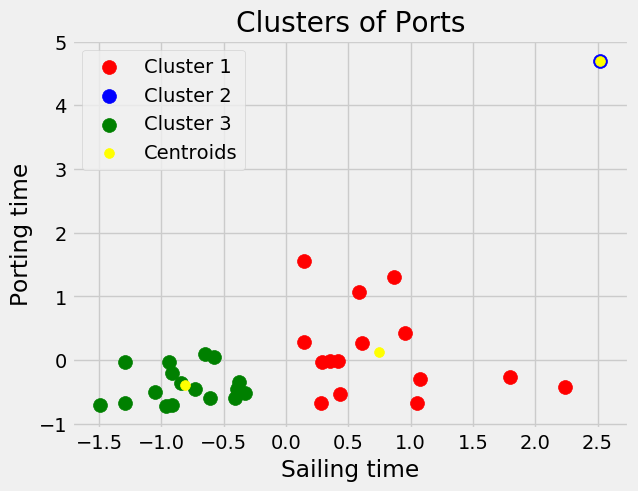

In [133]:
style.use('fivethirtyeight')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Ports')
plt.xlabel('Sailing time')
plt.ylabel('Porting time')
plt.legend()
plt.show()

# Which ports belong to any cluster ?

array([0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2])

In [136]:
bbbb['cluster'] = y_kmeans

In [137]:
#table['cluster'] = y_kmeans

In [139]:
cluster1_ports = bbbb.loc[bbbb.cluster==0,'Port name'].unique()
cluster2_ports = bbbb.loc[bbbb.cluster==1,'Port name'].unique()
cluster3_ports = bbbb.loc[bbbb.cluster==2,'Port name'].unique()

In [140]:
#cluster1_ports = table.loc[table.cluster==0,'Port name'].unique()
#cluster2_ports = table.loc[table.cluster==1,'Port name'].unique()
#cluster3_ports = table.loc[table.cluster==2,'Port name'].unique()

In [144]:
clus1 = df.loc[df['Port name'].isin(cluster1_ports)]
clus1 = clus1[['Port name', 'Coords X','Coords Y']] 

In [145]:
clus2 = df.loc[df['Port name'].isin(cluster2_ports)]
clus2 = clus2[['Port name', 'Coords X','Coords Y']] 

In [146]:
clus3 = df.loc[df['Port name'].isin(cluster3_ports)]
clus3 = clus3[['Port name', 'Coords X','Coords Y']] 

# print the ports that belong to any cluster by writing it below 

In [100]:
print(cluster1_ports)

['Port Said' 'Schiedam' 'Suez Canal' 'Wilmington (North Carolina)'
 'St Thomas' 'Haiphong' 'Barranquilla' 'Wellington' 'Kotka' 'Xiamen'
 'Lyttelton' 'Yokohama' 'Mobile' 'Porto Nuevo' 'Tauranga'
 'Tsing Yi Island' 'Jakarta' 'Keelung' 'Coco Solo North' 'Fort Lauderdale'
 'Phillipsburg' 'Vlissingen' 'Ringaskiddy' 'Kaohsiung' 'Bakar'
 'Helsingborg']


# ex: Ports belong to cluster 3 ( which have high port and sailing time)

In [157]:
print(cluster3_ports)

['Liverpool']


In [158]:
grouped = table.groupby('Port name').agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'),
            total_port = ('port_time', 'sum'))
print('Number of ports = ', len(grouped))


Number of ports =  33


In [159]:
grouped_all = pd.merge(grouped,df,left_on='Port name',right_on='Port name')
print('Number of ports = ', len(grouped_all))


Number of ports =  33


# Clustering ports by vessle size and number of visits yearly

In [160]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X = parameters.iloc[:, [9,10,11]].values

#X= StandardScaler().fit_transform(X)

#X= StandardScaler().fit_transform(X_S)


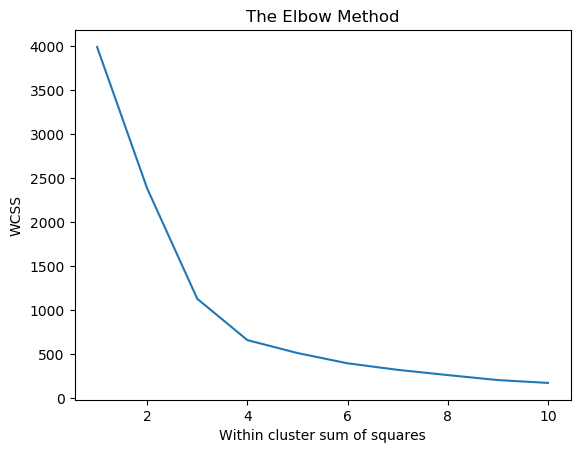

In [162]:
style.use('default')
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Within cluster sum of squares')
plt.ylabel('WCSS')
plt.show()

In [163]:
kmeans = KMeans(n_clusters =4 , init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


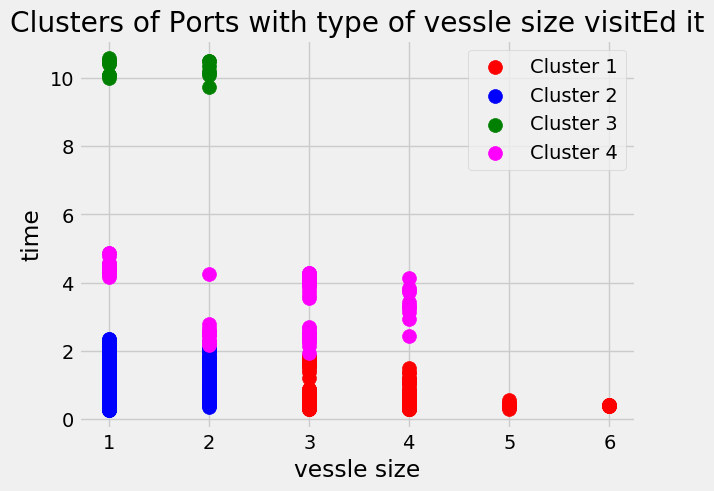

In [164]:
style.use('fivethirtyeight')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'fuchsia', label = 'Cluster 4')


plt.title('Clusters of Ports with type of vessle size visitEd it' )
plt.ylabel('time')
plt.xlabel('vessle size')
plt.legend()
plt.show()

In [165]:
clus = table

In [166]:
clus['cluster'] = y_kmeans

In [167]:
Cluster1_ports = clus.loc[clus.cluster==0,'Port name'].unique()
Cluster2_ports = clus.loc[clus.cluster==1,'Port name'].unique()
Cluster3_ports = clus.loc[clus.cluster==2,'Port name'].unique()
Cluster4_ports = clus.loc[clus.cluster==3,'Port name'].unique()


# Each cluster port name

In [168]:
print( 'Ports of cluster 1 : ', Cluster1_ports)
print('--------------')
print( 'Ports of cluster 2: ', Cluster2_ports)
print('--------------')
print( 'Ports of cluster 3 : ', Cluster3_ports)
print('--------------')
print( 'Ports of cluster 4 : ', Cluster4_ports)

Ports of cluster 1 :  ['Port Said' 'Suez Canal' 'Wellington' 'Xiamen' 'Yokohama' 'Mobile'
 'Tauranga' 'Hampton Roads' 'Tsing Yi Island' 'Coco Solo North' 'Bakar']
--------------
Ports of cluster 2:  ['Schiedam' 'Wilmington (North Carolina)' 'St Thomas' 'Haiphong'
 'Barranquilla' 'Wellington' 'Kotka' 'Xiamen' 'Lyttelton' 'Yokohama'
 'Laem Chabang' 'Porto Nuevo' 'Tauranga' 'Jacksonville' 'Klaipeda'
 'Hampton Roads' 'Tsing Yi Island' 'Jakarta' 'Keelung' 'Coco Solo North'
 'Fort Lauderdale' 'Vlissingen' 'Ringaskiddy' 'Kaohsiung' 'Bakar'
 'Helsingborg']
--------------
Ports of cluster 3 :  ['Liverpool']
--------------
Ports of cluster 4 :  ['Xiamen' 'Laem Chabang' 'Mobile' 'Phillipsburg' 'Vlissingen' 'Shekou'
 'Djibouti']


# Ports performance

In [174]:
grouped['performance'] = grouped['visits']/grouped['total_port']

In [175]:
perf = grouped.sort_values(by='performance',ascending=False)

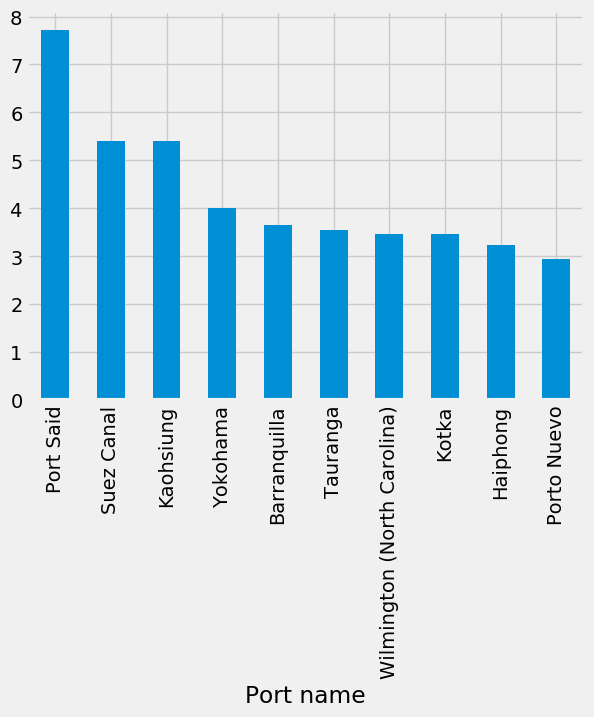

In [176]:
perf['performance'].head(10).plot.bar()

In [177]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [178]:
len(perf['performance'].values)

33

In [179]:
performance_scaled = min_max_scaler.fit_transform(perf[['performance']])
perf['performance_scaled'] = performance_scaled

Text(0.5, 1.0, 'Top performance ports')

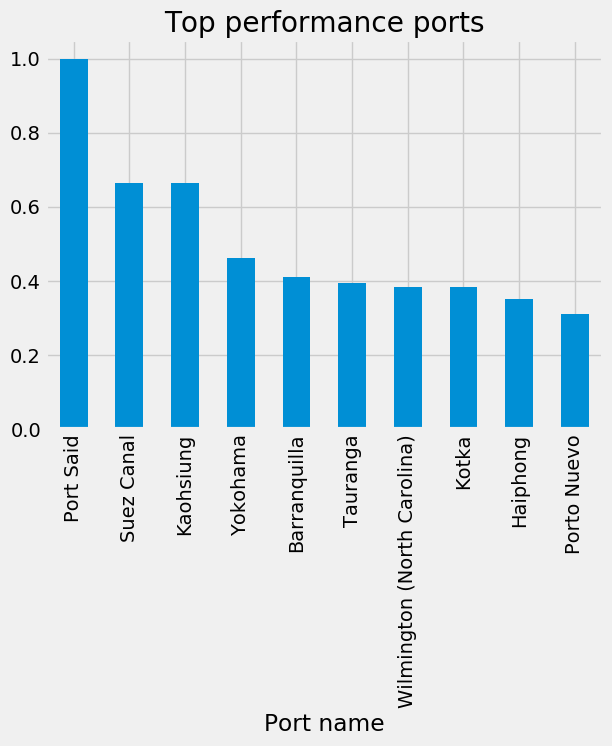

In [180]:
perf['performance_scaled'].head(10).plot.bar()
plt.title('Top performance ports')

Text(0.5, 1.0, 'low performance ports')

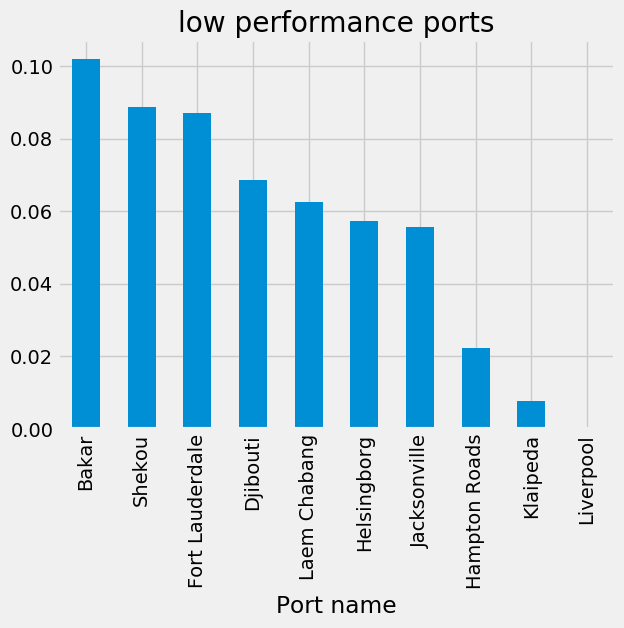

In [181]:
perf['performance_scaled'].tail(10).plot.bar()
plt.title('low performance ports')

In [378]:
table.columns

Index(['imo', 'Date', 'arrival', 'departure', 'country2', 'port2', 'country1',
       'port1', 'region2', 'region1', 'route', 'route_cat', 'sailing_time',
       'port_time', 'Vessel_size', 'Port name', 'Country', 'Code',
       'Harbour size', 'Shelter affored', 'Overhead limitation',
       'Channel depth', 'Anchorage depth', 'Cargo pier depth', 'Oil terminal',
       'Max vessel size', 'Turing area', 'Coords X', 'Coords Y'],
      dtype='object')

## Regression for visits with port time for each vessle size 

<img src="hh.png">

In [192]:
from scipy import stats

[Text(0.5, 1.0, 'Performance and port time')]

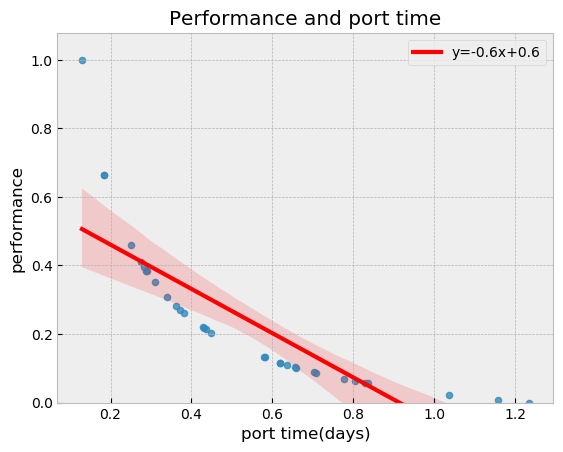

In [202]:
style.use('bmh')
slope, intercept, r_value, p_value, std_err = stats.linregress(perf['avg_port'],perf['performance_scaled'])

g = sns.regplot(x='avg_port', y='performance_scaled', data=perf,scatter_kws={"s": 20},line_kws={'color': 'red','label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
g.legend()
g.set(ylim=(0, None))

g.set(xlabel='port time(days)', ylabel='performance')
g.set(title='Performance and port time')

[Text(0.5, 1.0, 'visits and port time')]

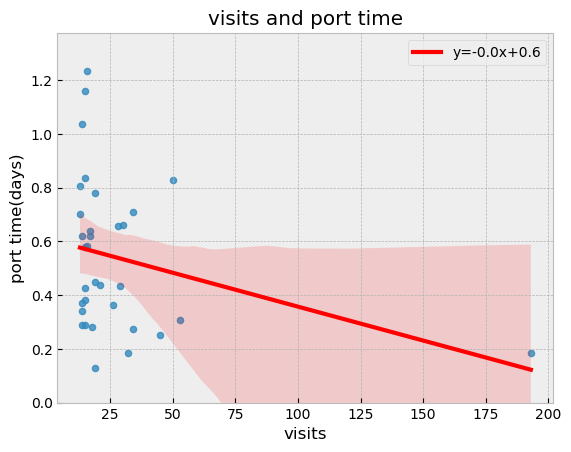

In [206]:
style.use('bmh')
slope, intercept, r_value, p_value, std_err = stats.linregress(perf['visits'],perf['avg_port'])
g = sns.regplot(y='avg_port', x='visits', data=perf,scatter_kws={"s": 20},line_kws={'color': 'red','label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
g.legend()
g.set(ylim=(0, None))
g.set(xlabel='visits', ylabel='port time(days)')
g.set(title='visits and port time')

In [189]:
pul = table[['port_time','sailing_time','Vessel_size']]

In [190]:
pul['port'] = min_max_scaler.fit_transform(pul[['port_time']])
pul['sail'] = min_max_scaler.fit_transform(pul[['sailing_time']])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [445]:
vessel_1 = pul[pul['Vessel_size'] ==1]
vessel_2 = pul[pul['Vessel_size'] ==2]
vessel_3 = pul[pul['Vessel_size'] ==3]
vessel_4 = pul[pul['Vessel_size'] ==4]
vessel_5 = pul[pul['Vessel_size'] ==5]
vessel_6 = pul[pul['Vessel_size'] ==6]


Vessel size 1 coefficient : y=0.2x+0.0
Vessel size 2 coefficient : y=0.6x+-0.0
Vessel size 3 coefficient : y=0.4x+0.0
Vessel size 4 coefficient : y=0.2x+0.0
Vessel size 5 coefficient : y=0.0x+0.0
Vessel size 6 coefficient : y=-0.0x+0.0


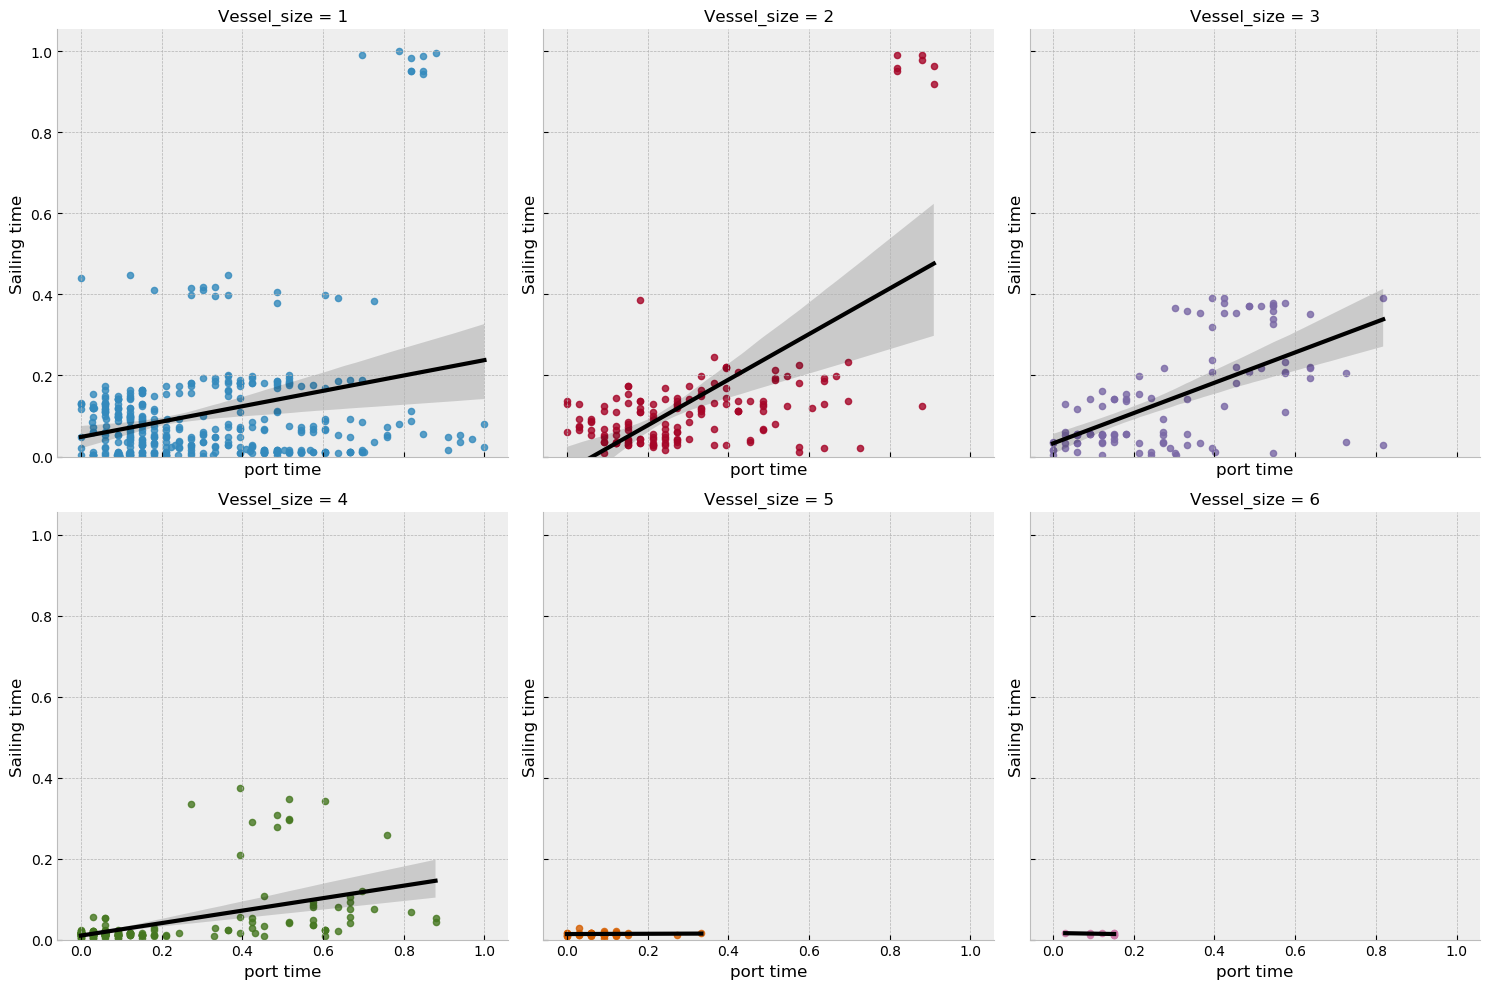

In [450]:
style.use('bmh')
slope, intercept, r_value, p_value, std_err = stats.linregress(pul['port'],pul['sail'])
g = sns.lmplot(x='port', y='sail', data=pul,scatter_kws={"s": 20,'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)},hue="Vessel_size",col="Vessel_size",col_wrap=3,line_kws={'color': 'black','label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})



g.set(xlabel='port time', ylabel='Sailing time')
style.use('default')
g.fig.tight_layout()
g.set(ylim=(0, None))     

slope, intercept, r_value, p_value, std_err = stats.linregress(vessel_1['port'],vessel_1['sail'])
print('Vessel size 1 coefficient : ' + "y={0:.1f}x+{1:.1f}".format(slope,intercept) )
slope, intercept, r_value, p_value, std_err = stats.linregress(vessel_2['port'],vessel_2['sail'])
print('Vessel size 2 coefficient : ' + "y={0:.1f}x+{1:.1f}".format(slope,intercept) )
slope, intercept, r_value, p_value, std_err = stats.linregress(vessel_3['port'],vessel_3['sail'])
print('Vessel size 3 coefficient : ' + "y={0:.1f}x+{1:.1f}".format(slope,intercept) )
slope, intercept, r_value, p_value, std_err = stats.linregress(vessel_4['port'],vessel_4['sail'])
print('Vessel size 4 coefficient : ' + "y={0:.1f}x+{1:.1f}".format(slope,intercept) )
slope, intercept, r_value, p_value, std_err = stats.linregress(vessel_5['port'],vessel_5['sail'])
print('Vessel size 5 coefficient : ' + "y={0:.1f}x+{1:.1f}".format(slope,intercept) )
slope, intercept, r_value, p_value, std_err = stats.linregress(vessel_6['port'],vessel_6['sail'])
print('Vessel size 6 coefficient : ' + "y={0:.1f}x+{1:.1f}".format(slope,intercept) )
#,col="Vessle size", col_wrap=2, height=3,hue="Vessle size",fit_reg=True

In [233]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import rfpimp

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


# Which variables effect most on number of port visits? 

In [234]:
features = [
       'Harbour size', 'Shelter affored', 'Overhead limitation',
       'Channel depth', 'Anchorage depth', 'Cargo pier depth', 'Oil terminal',
       'Max vessel size', 'Turing area','avg_port', 'avg_sail','visits']

In [235]:
df_train, df_test = train_test_split(grouped_all[features], test_size=0.20)
X_train, y_train = df_train.drop('visits',axis=1), df_train['visits']
X_test, y_test = df_test.drop('visits',axis=1), df_test['visits']

In [236]:
cc= grouped_all[features]

In [237]:
dff_train, dff_test = cc.drop('visits',axis=1), cc['visits']

# Fitting Random forest regressor to ports variables

<img src="fff.png">

In [238]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(dff_train, dff_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Radom forest feauture importance to determine which ports features has effect on the number of visits

In [239]:
imp = rfpimp.importances(rf,dff_train, dff_test)

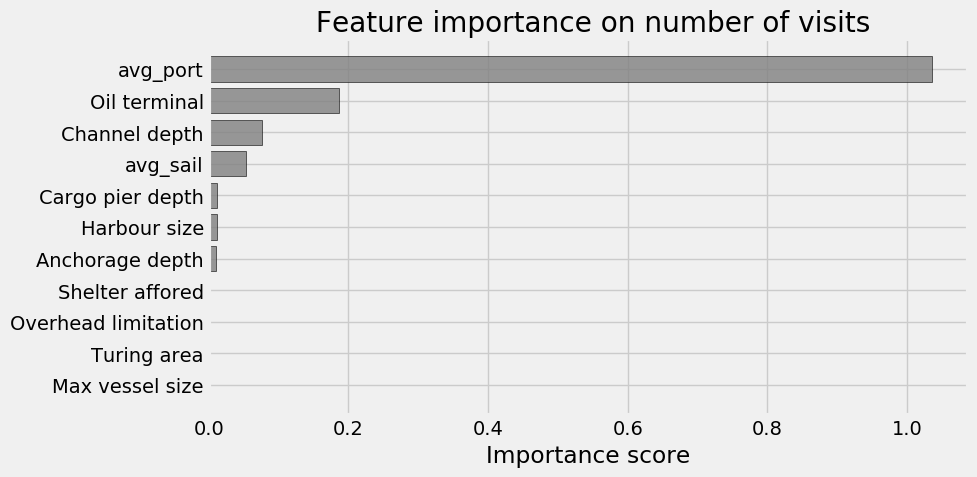

In [240]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title(' Feature importance on number of visits')

plt.gca().invert_yaxis()

fig.tight_layout()

# Top 5 active ports

In [376]:
top_active = pd.DataFrame(table.groupby('Port name')['imo'].count().sort_values(ascending=False).head())
top_ports = list(top_active.index)
print(top_ports)

['Suez Canal', 'Haiphong', 'Helsingborg', 'Yokohama', 'Barranquilla']


In [242]:

top_1 = table[table['Port name']== top_ports[0]]
top_2 = table[table['Port name']== top_ports[1]]
top_3 = table[table['Port name']== top_ports[2]]
top_4 = table[table['Port name']== top_ports[3]]
top_5 = table[table['Port name']== top_ports[4]]



# Monte Carlo simulation for ports activity 

In [259]:
def forecast(portname):
     port = no_17[no_17['Port name']==portname] 
     return port


### Run the cell and write down the port you want to forecast (without string)

In [402]:
portname = input('Enter port name :')

Enter port name :Helsingborg


In [403]:
def forecast(portname):
     port = no_17[no_17['Port name']==portname] 
     return port
port = forecast(portname)

In [404]:
port['Port name'].unique()

array(['Helsingborg'], dtype=object)

In [405]:
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))

In [406]:
t_intervals = 7 #I just wanted to forecast 3 time points stating from the current year
iterations = 1

In [407]:
from scipy.stats import norm
log_returns = np.log(1 + port_data.visits.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (var) #drift / trend of the logarithmic return
stdev = log_returns.std()

In [408]:
noise = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [409]:
S0 = port_data.visits.iloc[-1]
like_noise = np.zeros_like(noise)
like_noise[0] = S0

In [412]:
for t in range(1, t_intervals):
    like_noise[t] = like_noise[t - 1] * noise[t]


In [398]:
like_noise = pd.DataFrame(like_noise)
like_noise['simulation'] = like_noise[0]
like_noise['simulation']
i = port_data.index[-1] 
index = [i, i+1,i+2,i+3,i+4,i+5,i+6]
Forecast = pd.DataFrame(like_noise['simulation'])
Forecast.index= index

Text(0.5, 0.98, "['Forecasting Suez Canal visits']")

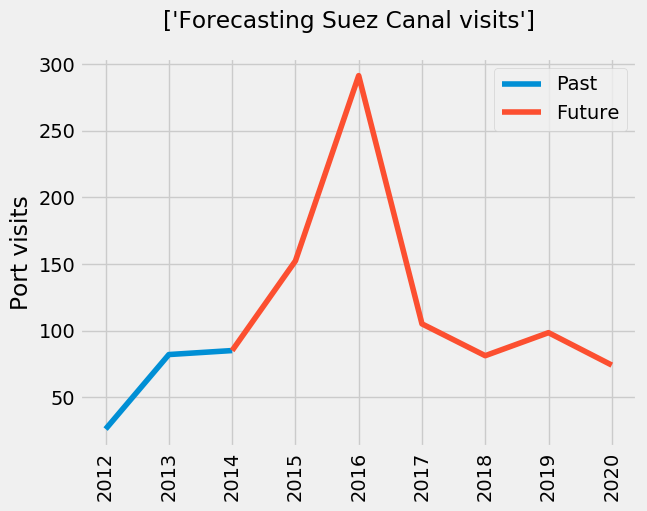

In [399]:
plt.plot(port_data.visits)

plt.plot(Forecast.simulation)
plt.legend(('Past','Future' ))


plt.xticks(rotation='vertical')
plt.ylabel('Port visits')
Title = 'Forecasting '+ port['Port name'].unique()+ ' visits'
plt.suptitle(Title)

# Monte carlo for top ports

In [428]:
def fff(port_data):
    log_returns = np.log(1 + port_data.visits.pct_change())
    u = log_returns.mean() #Mean of the logarithmich return
    var = log_returns.var() #Variance of the logarithic return
    drift = u - (0.5*var) #drift / trend of the logarithmic return
    stdev = log_returns.std()

    noise = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
    S0 = port_data.visits.iloc[-1]
    like_noise = np.zeros_like(noise)
    like_noise[0] = S0 

    return noise , like_noise

In [429]:

def touch(like_noise,noise):
    
    for t in range(1, t_intervals):
        like_noise[t] = like_noise[t - 1] * noise[t]
        
        
    return like_noise    


In [430]:
def edit(like_noise):
    like_noise = pd.DataFrame(like_noise)
    like_noise['simulation'] = like_noise[0]
    like_noise['simulation']
    i = port_data.index[-1] 
    index = [i, i+1,i+2,i+3,i+4,i+5,i+6]
    Forecast = pd.DataFrame(like_noise['simulation'])
    Forecast.index= index
    
    return Forecast

In [431]:
def plot_forecast(port_data,Forecast):
    plt.plot(port_data.visits)

    plt.plot(Forecast)
    plt.legend(('Past','Future' ))


    plt.xticks(rotation='vertical')
    plt.ylabel('Port visits')
    Title = 'Forecasting '+ port['Port name'].unique()+ ' visits'
    plt.suptitle(Title)

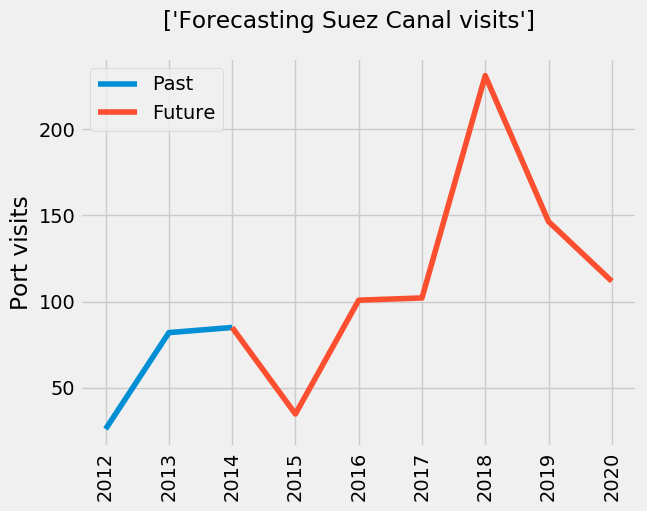

In [432]:
port = forecast(top_ports[0]) 
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))

noise , like_noise  = fff(port_data)
like_noise = touch(like_noise,noise)
Forecast = edit(like_noise)
plot_forecast(port_data,Forecast)

In [ ]:
port = forecast(top_ports[1]) 
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))

noise , like_noise  = fff(port_data)
like_noise = touch(like_noise,noise)
Forecast = edit(like_noise)
plot_forecast(port_data,Forecast)

In [ ]:
port = forecast(top_ports[2]) 
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))

noise , like_noise  = fff(port_data)
like_noise = touch(like_noise,noise)
Forecast = edit(like_noise)
plot_forecast(port_data,Forecast)

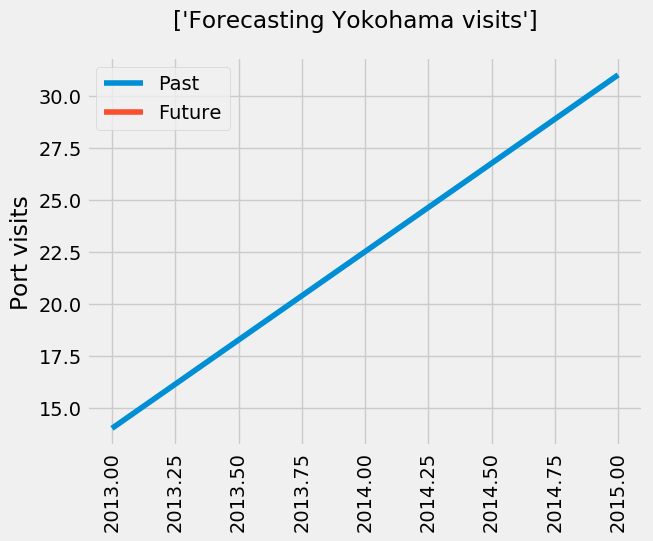

In [401]:
port = forecast(top_ports[3]) 
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))

noise , like_noise  = fff(port_data)
like_noise = touch(like_noise,noise)
Forecast = edit(like_noise)
plot_forecast(port_data,Forecast)

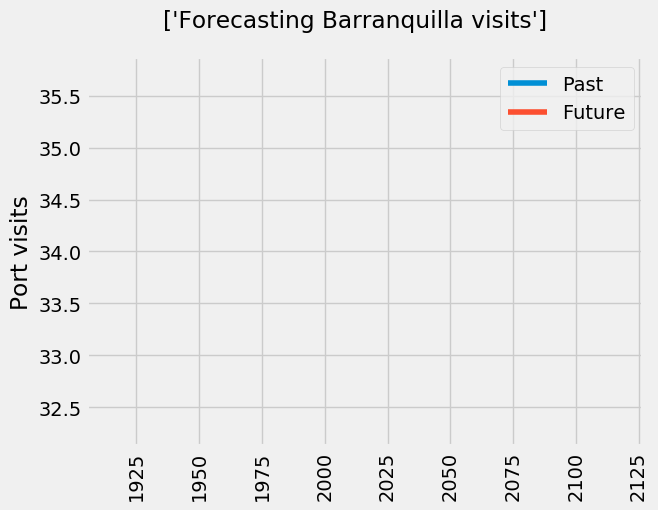

In [400]:
port = forecast(top_ports[4]) 
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))

noise , like_noise  = fff(port_data)
like_noise = touch(like_noise,noise)
Forecast = edit(like_noise)
plot_forecast(port_data,Forecast)

In [361]:
noise = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [369]:
noise

array([[0.66683436],
       [0.50279002],
       [2.26430926],
       [1.51461641],
       [0.35180857],
       [2.47356744],
       [1.43388671]])

In [370]:
S0 = port_data.visits.iloc[-1]

In [372]:
like_noise = np.zeros_like(noise)
like_noise[0] = S0
like_noise

array([[85.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [374]:
like_noise

array([[ 85.        ],
       [ 42.73715193],
       [ 96.77012872],
       [146.56962522],
       [ 51.56445031],
       [127.54814524],
       [182.88959031]])

In [375]:
like_noise = pd.DataFrame(like_noise)
like_noise['simulation'] = like_noise[0]
like_noise['simulation']

0     85.000000
1     42.737152
2     96.770129
3    146.569625
4     51.564450
5    127.548145
6    182.889590
Name: simulation, dtype: float64

In [366]:
i = port_data.index[-1] 
index = [i, i+1,i+2,i+3,i+4,i+5,i+6]

In [367]:
Forecast = pd.DataFrame(like_noise['simulation'])
Forecast.index= index
#Forecast

Text(0.5, 0.98, "['Forecasting Suez Canal visits']")

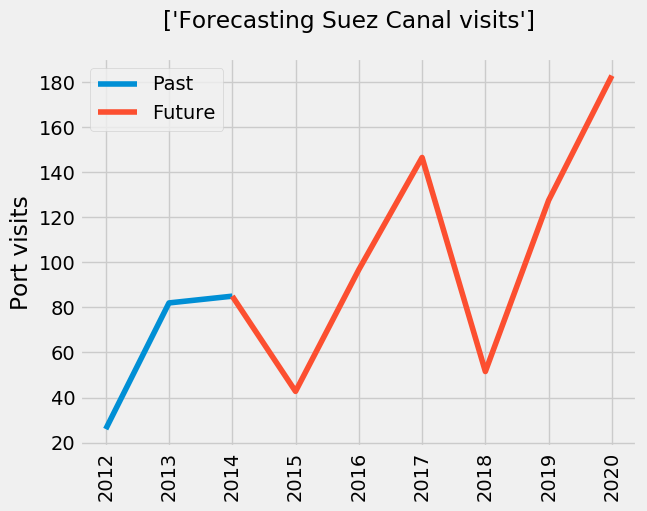

In [368]:
plt.plot(port_data.visits)

plt.plot(Forecast.simulation)
plt.legend(('Past','Future' ))


plt.xticks(rotation='vertical')
plt.ylabel('Port visits')
Title = 'Forecasting '+ port['Port name'].unique()+ ' visits'
plt.suptitle(Title)


In [ ]:
port = forecast(top_ports[4])
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))
    
    
Forecast = ff(port_data) 
plot_forecast(port_data,Forecast)

In [284]:
neu = pd.DataFrame(grouped_all[['Harbour size', 'Shelter affored', 'Overhead limitation',
       'Channel depth', 'Anchorage depth', 'Cargo pier depth', 'Oil terminal',
       'Max vessel size', 'Turing area','avg_port', 'avg_sail','Coords X', 'Coords Y','visits']])

# Feature Engineering

### Extraxct Date feautres (day,month,year)
### departure and arrival hour , which day of week

### create a sine and a cosine facet of each of these three variables (i.e., month, day, hour), which will retain the fact that hour 24 is closer to hour 0 than to hour 21


In [285]:
parameters['year'] = table['Date'].dt.year
parameters['month'] = table['Date'].dt.month
parameters['day'] = table['Date'].dt.day
parameters['arrive_hour'] = table['arrival'].dt.hour
parameters['dep_hour'] = table['departure'].dt.hour
parameters['arrive_hour'] = table['arrival'].dt.hour
parameters['dep_hour'] = table['departure'].dt.hour
parameters['arrive_sin_hour']=np.sin(2*np.pi*parameters['arrive_hour']/24)
parameters['dep_sin_hour']=np.sin(2*np.pi*parameters['dep_hour']/24)
parameters['arrive_cos_hour']=np.cos(2*np.pi*parameters['arrive_hour']/24)
parameters['dep_cos_hour']=np.cos(2*np.pi*parameters['dep_hour']/24)
parameters['day_of_week'] = table['Date'].dt.dayofweek


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

#  FORCASTING TOP PORTS (ARIMA)

In [286]:
top_active = pd.DataFrame(table.groupby('Port name')['imo'].count().sort_values(ascending=False).head(10))
top_ports = list(top_active.index)
print(top_ports)

['Suez Canal', 'Haiphong', 'Helsingborg', 'Yokohama', 'Barranquilla', 'Fort Lauderdale', 'Kaohsiung', 'Bakar', 'Lyttelton', 'Xiamen']


### Run the cell and write down the port you want to forecast (without string)

In [285]:
portname = input('Enter port name :')

Enter port name :Suez Canal


In [287]:
def forecast(portname):
     port = no_17[no_17['Port name']==portname] 
     return port
port = forecast(portname)


In [288]:
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))

In [289]:


from statsmodels.tsa.arima_model import ARMA
from random import random

data = port_data.visits

# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp= False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+5)


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [292]:
def ff(port):
    
    data = port.visits
    
    model = ARMA(port.visits, order=(2,0, 1))
    model_fit = model.fit(disp= False)
# make prediction
    yhat = model_fit.predict(len(data), len(data)+5)
    
    i = port.index[-1] 
    index = [i, i+1,i+2,i+3,i+4,i+5,i+6]
    
    prediction = list(yhat.values)
    prediction = [port.visits.iloc[-1],*prediction]
    
    
    Forecast = pd.DataFrame(prediction)
    Forecast.index= index
    return Forecast
    
    

In [293]:
dodd = ff(port_data)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0.5, 0.98, "['Forecasting Suez Canal visits']")

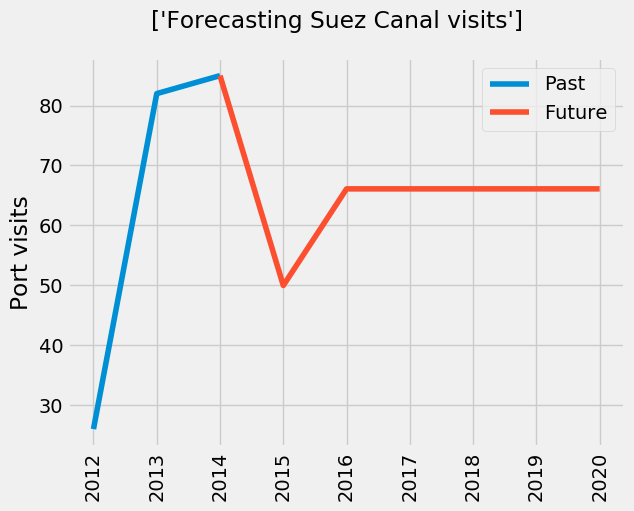

In [295]:
plt.plot(port_data.visits)

plt.plot(dodd)
plt.legend(('Past','Future' ))


plt.xticks(rotation='vertical')
plt.ylabel('Port visits')
Title = 'Forecasting '+ port['Port name'].unique()+ ' visits'
plt.suptitle(Title)

# Plotting forecast for top ports

In [296]:
top_active = pd.DataFrame(table.groupby('Port name')['imo'].count().sort_values(ascending=False).head(10))
top_ports = list(top_active.index)

In [297]:
def forecast(portname):
     port = no_17[no_17['Port name']==portname] 
     return port

In [298]:
def ff(port):
    
    data = port.visits
    
    model = ARMA(port.visits, order=(2,0, 1))
    model_fit = model.fit(disp= False)

    yhat = model_fit.predict(len(data), len(data)+5)
    
    i = port.index[-1] 
    index = [i, i+1,i+2,i+3,i+4,i+5,i+6]
    
    prediction = list(yhat.values)
    prediction = [port.visits.iloc[-1],*prediction]
    
    
    Forecast = pd.DataFrame(prediction)
    Forecast.index= index
    return Forecast

In [299]:
def plot_forecast(port_data,Forecast):
    plt.plot(port_data.visits)

    plt.plot(Forecast)
    plt.legend(('Past','Future' ))


    plt.xticks(rotation='vertical')
    plt.ylabel('Port visits')
    Title = 'Forecasting '+ port['Port name'].unique()+ ' visits'
    plt.suptitle(Title)
    

In [302]:
for i in top_ports:
    print(i)

Suez Canal
Haiphong
Helsingborg
Yokohama
Barranquilla
Fort Lauderdale
Kaohsiung
Bakar
Lyttelton
Xiamen


In [ ]:
for i in top_ports:
    
    port = forecast(i)
    port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))
    
    
    Forecast = ff(port_data) 
    plot_forecast(port_data,Forecast)

In [ ]:
port = forecast(top_ports[0])
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))
    
    
Forecast = ff(port_data) 
plot_forecast(port_data,Forecast)

In [ ]:
port = forecast(top_ports[1])
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))
    
    
Forecast = ff(port_data) 
plot_forecast(port_data,Forecast)

In [ ]:
port = forecast(top_ports[2])
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))
    
    
Forecast = ff(port_data) 
plot_forecast(port_data,Forecast)

In [ ]:
port = forecast(top_ports[3])
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))
    
    
Forecast = ff(port_data) 
plot_forecast(port_data,Forecast)

In [ ]:
port = forecast(top_ports[4])
port_data = port.groupby(port['Date'].dt.year.rename('year')).agg(
             visits=('imo', 'count'),
             avg_port=('port_time', 'mean'),
             avg_sail=('sailing_time', 'mean'))
    
    
Forecast = ff(port_data) 
plot_forecast(port_data,Forecast)

# Answering more  questions

In [19]:
table.columns

Index(['imo', 'Date', 'arrival', 'departure', 'country2', 'port2', 'country1',
       'port1', 'region2', 'region1', 'route', 'route_cat', 'sailing_time',
       'port_time', 'Vessel_size', 'Port name', 'Country', 'Code',
       'Harbour size', 'Shelter affored', 'Overhead limitation',
       'Channel depth', 'Anchorage depth', 'Cargo pier depth', 'Oil terminal',
       'Max vessel size', 'Turing area', 'Coords X', 'Coords Y'],
      dtype='object')

# How many percent of the total visits are  visits of large vessels (type 5,6) ?

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

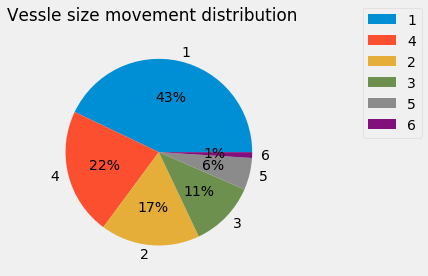

In [24]:
table['Vessel_size'].value_counts().plot.pie(autopct='%1.0f%%')
plt.suptitle('Vessle size movement distribution')
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15))
plt.axes().set_ylabel('')

# Further analysis on large vessels (type 5,6)

In [43]:
big_vessels = table[table['Vessel_size'] > 4 ]

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

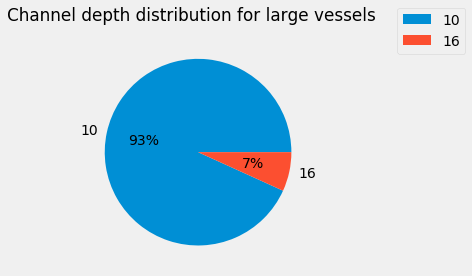

In [44]:
big_vessels['Channel depth'].value_counts().plot.pie(autopct='%1.0f%%')
plt.suptitle('Channel depth distribution for large vessels')
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15))
plt.axes().set_ylabel('')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

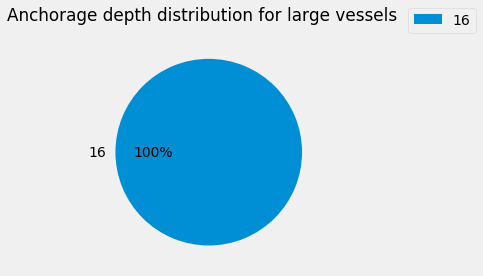

In [45]:
big_vessels['Anchorage depth'].value_counts().plot.pie(autopct='%1.0f%%')
plt.suptitle('Anchorage depth distribution for large vessels')
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15))
plt.axes().set_ylabel('')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

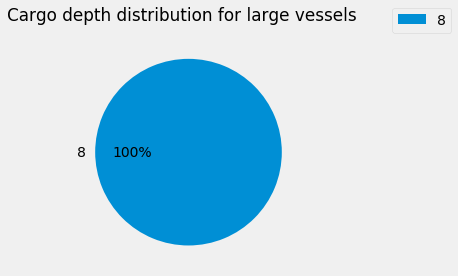

In [47]:
big_vessels['Cargo pier depth'].value_counts().plot.pie(autopct='%1.0f%%')
plt.suptitle('Cargo depth distribution for large vessels')
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15))
plt.axes().set_ylabel('')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

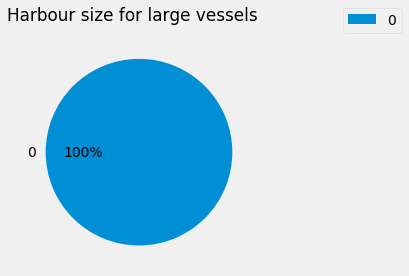

In [50]:
big_vessels['Harbour size'].value_counts().plot.pie(autopct='%1.0f%%')
plt.suptitle('Harbour size for large vessels')
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15))
plt.axes().set_ylabel('')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

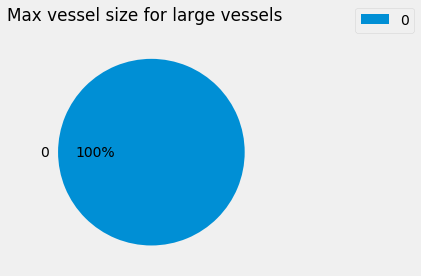

In [51]:
big_vessels['Max vessel size'].value_counts().plot.pie(autopct='%1.0f%%')
plt.suptitle('Max vessel size for large vessels')
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15))
plt.axes().set_ylabel('')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

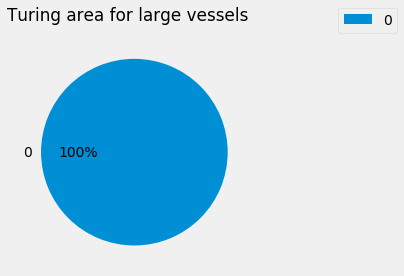

In [52]:
big_vessels['Turing area'].value_counts().plot.pie(autopct='%1.0f%%')
plt.suptitle('Turing area for large vessels')
plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15))
plt.axes().set_ylabel('')

In [66]:
s = len(big_vessels)

In [97]:
pd.options.display.float_format = "{:,.2f}".format

In [99]:
channel = pd.DataFrame(pd.crosstab(big_vessels['Channel depth'],big_vessels['Vessel_size']).apply(lambda r: r/s))
channel

Vessel_size,5,6
Channel depth,,
10,0.78,0.15
16,0.07,0.00


In [100]:
cargo = pd.DataFrame(pd.crosstab(big_vessels['Cargo pier depth'],big_vessels['Vessel_size']).apply(lambda r: r/s))
cargo

Vessel_size,5,6
Cargo pier depth,,
8,0.85,0.15


In [101]:
ph = pd.DataFrame(pd.crosstab(big_vessels['Cargo pier depth'],big_vessels['Vessel_size']).apply(lambda r: r/s))
ph

Vessel_size,5,6
Cargo pier depth,,
8,0.85,0.15


In [102]:
anc = pd.DataFrame(pd.crosstab(big_vessels['Anchorage depth'],big_vessels['Vessel_size']).apply(lambda r: r/s))
anc

Vessel_size,5,6
Anchorage depth,,
16,0.85,0.15


In [103]:
maxV = pd.DataFrame(pd.crosstab(big_vessels['Max vessel size'],big_vessels['Vessel_size']).apply(lambda r: r/s))
maxV

Vessel_size,5,6
Max vessel size,,
0,0.85,0.15


# new part 

In [115]:
#dataframes are : clus1 clus2 clus3

In [147]:
clus1.head() #clus2 


,Port name,Coords X,Coords Y
9,Xiamen,24.503175,118.029
12,Laem Chabang,13.083333,100.883
16,Jacksonville,30.316667,-81.65
17,Klaipeda,55.716667,21.1167
18,Hampton Roads,37.014722,-76.3442


In [148]:
clus3.head()

,Port name,Coords X,Coords Y
0,Port Said,31.244780,32.323
1,Schiedam,32.083333,-81.0833
2,Suez Canal,30.494735,32.3447
3,Wilmington (North Carolina),34.233333,-77.95
4,St Thomas,18.332230,-64.9396


In [150]:
clus2.head()

,Port name,Coords X,Coords Y
24,Liverpool,53.416667,-3
